<h1 style="font-weight:bold;text-align:center"> Bank Telemarketing Marketing Campaign </h1>

***

<p style="text-align:center;font-weight:600">&emsp;Sean Kristian Anderson&emsp;||&emsp;Davis Sebastian&emsp;</p>
<p style="text-align:center;">DTIDS-0206 Final Project by Alpha Team</p>

***

<p style="font-weight:500">Table Of Contents</p>

1. [Business Problem Understanding](#1-business-problem-understanding)       
    1.1. [Background](#11-background)       
    1.2. [Problem Statement](#12-problem-statement)     
    1.3. [Objectives](#13-objectives)       
    1.4. [Metric Evaluation](#14-metric-evaluation)     
        &emsp;1.4.1. [Cost Analysis](#141-cost-analysis)        
    1.5. [Analytical Approach](#15-analytical-approach)     
2. [Data Understanding](#2-data-understanding)       
    2.1. [Attribute Information](#21-attribute-information)      
    2.2. [Import Libraries](#22-import-libraries)     
    2.3. [Import Data](#23-import-data)     
    2.4. [Basic Exploration](#24-basic-exploration)     
3. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)      
    3.1. [Data Distribution](#31-data-distribution)      
        &emsp;3.1.1. [Numerical Distribution](#311-numerical-distribution)      
        &emsp;3.1.2. [Categorical Distribution](#312-categorical-distribution)      
        &emsp;3.1.3. [Duplicated Values](#313-duplicated-values)      
        &emsp;3.1.4. [Missing Values](#314-missing-values)      
        &emsp;3.1.5. [Correlation of Numerical Columns](#315-correlation-of-numerical-columns)      
    3.2. [Numerical Columns Data towards Target Variable](#32-numerical-columns-data-towards-target-variable)     
    3.3. [Categorical Columns Data towards Target Variable](#33-categorical-columns-data-towards-target-variable)       
4. [Data Preprocessing](#4-data-preprocessing)       
    4.1. [Duplicated Values](#41-duplicated-values)       
    4.2. [Missing Values](#42-missing-values)       
    4.3. [Outliers](#43-outliers)       
    4.4. [Data Preprocessing Pipeline](#44-data-preprocessing-pipeline)        
5. [Feature Engineering](#5-feature-engineering)        
    5.1. [Data Split](#51-data-split)       
    5.2. [Feature Encoding](#52-feature-encoding)       
        &emsp;5.2.1. [pdays Column Bin](#521-pdays-column-bin)      
        &emsp;5.2.2. [Categorical Column](#522-categorical-column)      
        &emsp;5.2.3. [Feature Encoding Transformer](#523-feature-encoding-transformer)      
    5.3. [Feature Scaling](#53-feature-scaling)       
    5.4. [Feature Engineering Pipeline](#54-feature-engineering-pipeline)       
6. [Modeling](#6-modeling)        
    6.1. [Data Preparation](#61-data-preparation)       
    6.2. [Modeling](#62-modeling)       
        &emsp;6.2.1. [Model Benchmark against Raw Data](#621-model-benchmark-against-raw-data)      
        &emsp;6.2.2. [Model Benchmark against Oversampled Data](#622-model-benchmark-against-oversampled-data)      
        &emsp;6.2.3. [Model Benchmark against Removed Multicollienarity](#623-model-benchmark-against-removed-multicollinearity)      
        &emsp;6.2.4. [Hyperparameter Tuning](#624-hyperparameter-tuning)      
        &emsp;6.2.5. [Modeling Pipeline](#625-modeling-pipeline)      
    6.3. [Analysis](#63-analysis)       
        &emsp;6.3.1. [Model Benchmark Analysis](#631-model-benchmark-analysis)      
        &emsp;6.3.2. [Feature Importance](#632-feature-importance)      
        &emsp;6.3.3. [Business ML Analysis](#633-business-ml-analysis)      
7. [Conclusion and Recommendation](#conclusion-and-recommendation)        
    7.1. [Conclusion](#71-conclusion)     
    7.2. [Recommendation](#72-recommendation)     



Tableau:

Slide Presentation: <a href src="https://www.canva.com/design/DAGeScCufiI/OtTsdTuXp_rSrNaKOxwcsQ/edit?utm_content=DAGeScCufiI&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton">Click Here</a>

## **1. Business Problem Understanding**

### **1.1. Background**

A Portuguese banking institution conducted a telemarketing campaigns. With the goal of spreading awareness and convincing customers to open a term deposit account. Given the data from 2008 to 2010, seen from the graph below that Portugal GDP growth was decreasing from 2007 before it sinks in 2009. As it was the worst Portugal GDP growth for more than 15 years.

GDP refers to the dollar value of all final goods and services produced within a country’s borders in a given year [[Corporate Finance Institute, 2023](https://corporatefinanceinstitute.com/resources/economics/negative-growth/)]. Positive GDP growth indicates that the economy is doing well by the increasing productivity in a country. Meanwhile, negative GDP growth are marked by decreasing personal income, higher unemployment, and decline in wholesale or retail sales [[Investopedia, 2020](https://www.investopedia.com/terms/n/negative-growth.asp)].

<iframe src="https://data.worldbank.org/share/widget?contextual=default&end=2020&indicators=NY.GDP.MKTP.KD.ZG&locations=PT&start=1990" width='450' height='300' frameBorder='0' scrolling="no" ></iframe>

Term deposit is a deposit in financial institution with a specific maturity date or period to maturity. Some of the benefits of this kind of deposit includes: [[Tata AIA Blogs, 2024](https://www.tataaia.com/blogs/financial-planning/what-is-a-term-deposit-and-its-benefits.html#:~:text=Term%20Deposit%20Benefits,-Guaranteed%20returns1&text=The%20returns%20are%20fixed%20at,will%20receive%20and%20by%20when.)]

- Minimum risk: term deposit interest rates are fixed and unaffected by the market sentiment or financial institution’s policies,
- Flexible: term deposit allow small investment amount and the period can be adjusted accordingly.

While maintaining good benefit for customers, term deposit also help banks by make money between the interest rate they pay on deposits and the interest rate they receive by funding loans.


As Portugal was encountering economical struggle in 2008 - 2009, banking institution certainly having difficulties finding term deposit customers. Which lead in conducting direct telemarketing campaigns, by making a phone call to customers. As this method might works to convince the customers, it’s not effective and exhausting. There are more than 41 thousand records and customer could be contacted for more than once, which is time-consuming. In addition, the outcome could be disappointing and ends in wasted resources.

### **1.2. Problem Statement**

Direct marketing, is a marketing strategy that reaching out potential customers directly via phone calls, emails, etc. Although this strategy requires low cost, it has many drawbacks includes irritates customer, time consuming, limited reaches [[Educba, 2025](https://www.educba.com/advantages-and-disadvantages-of-direct-marketing/)]. Typically, this method has a low conversion rate despite all the effort marketing team had put in this method. In addition without proper prediction such as no initial screening before performing the call, the wasted effort becomes worse.

### **1.3. Objectives**

Despite the drawbacks from direct telemarketing strategy, the effectiveness of this method can be increased using machine learning. The model have a goal to increase the institution benefit by predicting the likelihood of customers open a term deposit account while reducing its expenses by avoiding unnecessary calls. Allowing them to secure as many term deposits as quickly as possible for operational purposes. In addition, this model will also introduce a stronger bank customer relationship by minimizing the disturbance for them. Later on, this model should be the guidelines for the marketing team before performing the calls in order to yield efficient campaigns.

### **1.4. Metric Evaluation**

Target variables in this analysis as following:     
0 : Not opening a term deposit      
1 : Opening a term deposit      

<table>
    <body>
        <tr>
            <td colspan="2" rowspan="2"></td>
            <th colspan="2">Actual</th>
        </tr>
        <tr>
            <th>0</th>
            <th>1</th>
        </tr>
        <tr>
            <th rowspan="2">Predicted</th>
            <th>0</th>
            <td><strong><center>TN (True Negative)</center></strong><br />
                The model predicts correctly for customer will not open a deposit account</td>
            <td><strong><center>FN (False Negative)</center></strong>
                <center>Type II Error</center><br />
                The model predicts that customer will not open a deposit account while in reality, they will</td>
        </tr>
        <tr>
            <th>1</th>
            <td><strong><center>FP (False Positive)</center></strong>
                <center>Type I Error</center><br />
                The model predicts that customer will open a deposit account while in reality, they will not</td>
            <td><strong><center>TP (True Positive)</center></strong><br /><br />
                The model predicts correctly for customer will open a deposit account</td>
        </tr>
    </body>
</table>

**Type I Error (FP)** consequences:       
- Introduce a disturbance for customer, might lead to loosen bank - customer relationship,      
- Wasted resources by making unnecessary calls.

**Type II Error (FN)** consequences:     
- Loss in potential customers,       
- Decreasing company revenue.

#### **1.4.1. Cost Analysis**

### **1.5. Analytical Approach**

First, the data will be analyzed in order to uncover any patterns that distinguish customers with likelihood to open a term deposit account. Strategies to approach on potential customer will be developer later on based on the insights from the data. Above all, classification model will help the bank institute to predict the likelihood of a customer opening a term deposit account.

## **2. Data Understanding**

### **2.1. Attribute Information**

Attribute Related to Bank Client Data

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| age | Integer | Age of users |
| job | Text (Categorical) | Type of Job | "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| marital | Text (Categorical) | Marital status of users | "divorced","married","single","unknown" |
| education | Text (Categorical) | Education of users | "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown" |
| default | Text (Categorical) | Has Credit in default? | "no","yes","unknown" |
| housing | Text (Categorical) | Has Housing Loan? | "no","yes","unknown" |
| loan | Text (Categorical) | Has Personal Loan? | "no","yes","unknown" |

Attribute Related to Last Contact

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| contact | Text (Categorical) | Last contact communication type | "cellular","telephone" |
| month | Text (Categorical) | Last contact month of year | "jan", "feb", "mar", "apr", "may", "june", "july", "aug", "sept", "oct", "nov", "dec" |
| day_of_week | Text (Categorical) | Last contact day of week | "mon","tue","wed","thu","fri" | 
| duration | Integer | Last contact duration |

Attribute Related to Bank Campaign

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- |
| campaign | Integer | Number of contacts performed during this campaign and for this client |
| pdays | Integer | Number of days passed after the client was last contacted from previous campaign |
| previous | Integer | Number of contacts performed before this campaign and for this client |
| poutcome | Text (Categorical) | Outcome of the previous marketing campaign | "failure","nonexistent","success" |

Attribute Related to Social and Economic Contexts

| Attribute | Data Type | Description |
| --- | --- | --- |
| emp.var.rate | Float | Employment variation rate |
| cons.price.idx | Float | Consumer price index |
| cons.conf.idx | Float | Consumer confidence index |
| euribor3m | Float | Euribor 3 month rate - daily indicator |
| nr.employed | Float | Number of employees - quarterly indicator |

Other Attribute

| Attribute | Data Type | Description | Expected Values |
| --- | --- | --- | --- | 
| y | Text (Categorical) | Subscribed a term deposit (output) | "yes", "no" |

### **2.2 Import Libraries**

In [ ]:
# Library
import pandas as pd
import numpy as np
import pickle
from scipy.stats import anderson
import optuna
from sklearn.base import BaseEstimator, TransformerMixin

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, KBinsDiscretizer, FunctionTransformer, StandardScaler, MinMaxScaler, MaxAbsScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Selection
from sklearn import metrics
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve, auc, fbeta_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV, cross_validate

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# GCP
import os
from google.cloud import bigquery, storage, aiplatform

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', 1000, "max_colwidth", 1000, 'display.width', 1000, 'display.max_rows',1000)

### **2.3. Import Data**

In [2]:
df = pd.read_csv('../Dataset/bank-additional-full.csv', sep=';')
display(df.head(), df.tail())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### **2.4. Basic Exploration**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
list_data_num = []
list_data_cat = []

for col in df.select_dtypes(exclude='object').columns:
    list_data_num.append([col, df[col].dtype, df[col].isnull().sum(), round(df[col].isnull().sum() / df.shape[0] * 100, 2),
                     df[col].nunique(), df[col].unique()])
    
for col in df.select_dtypes(include='object').columns:
    list_data_cat.append([col, df[col].dtype, sum(df[col] == 'unknown'), round((sum(df[col] == 'unknown') / df.shape[0]) * 100, 2),
                     df[col].nunique(), df[col].unique()])
    
display(
    pd.DataFrame(data=list_data_num, columns=['column', 'type', 'null', 'null_pct', 'unique', 'values']),
    pd.DataFrame(data=list_data_cat, columns=['column', 'type', 'null', 'null_pct', 'unique', 'values'])
)

,column,type,null,null_pct,unique,values
0,age,int64,0,0.0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,duration,int64,0,0.0,1544,"[261, 149, 226, 151, 307, 198, 139, 217, 380, 50, 55, 222, 137, 293, 146, 174, 312, 440, 353, 195, 38, 262, 342, 181, 172, 99, 93, 233, 255, 362, 348, 386, 73, 230, 208, 336, 365, 1666, 577, 366, 314, 160, 212, 188, 22, 616, 178, 355, 225, 266, 253, 179, 269, 135, 161, 787, 145, 449, 812, 164, 357, 232, 91, 273, 158, 177, 200, 176, 211, 214, 1575, 349, 337, 272, 193, 165, 1042, 20, 246, 529, 192, 1467, 180, 48, 213, 545, 583, 221, 426, 287, 197, 257, 229, 400, 190, 21, 300, 123, 325, 514, ...]"
2,campaign,int64,0,0.0,42,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 18, 23, 14, 22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31, 30, 41, 37, 40, 33, 34, 43]"
3,pdays,int64,0,0.0,27,"[999, 6, 4, 3, 5, 1, 0, 10, 7, 8, 9, 11, 2, 12, 13, 14, 15, 16, 21, 17, 18, 22, 25, 26, 19, 27, 20]"
4,previous,int64,0,0.0,8,"[0, 1, 2, 3, 4, 5, 6, 7]"
5,emp.var.rate,float64,0,0.0,10,"[1.1, 1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3.0, -1.7, -1.1]"
6,cons.price.idx,float64,0,0.0,26,"[93.994, 94.465, 93.918, 93.444, 93.798, 93.2, 92.756, 92.843, 93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649, 92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199, 94.601, 94.767]"
7,cons.conf.idx,float64,0,0.0,26,"[-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45.9, -50.0, -47.1, -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33.0, -34.8, -34.6, -40.0, -39.8, -40.3, -38.3, -37.5, -49.5, -50.8]"
8,euribor3m,float64,0,0.0,316,"[4.857, 4.856, 4.855, 4.859, 4.86, 4.858, 4.864, 4.865, 4.866, 4.967, 4.961, 4.959, 4.958, 4.96, 4.962, 4.955, 4.947, 4.956, 4.966, 4.963, 4.957, 4.968, 4.97, 4.965, 4.964, 5.045, 5.0, 4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76, 4.733, 4.7, 4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191, 4.153, 4.12, 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743, 3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799, 1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65, 1.64, 1.629, 1.614, 1.602, 1.584, 1.574, 1.56, 1.556, 1.548, 1.538, 1.531, 1.52, 1.51, 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435, 1.423, 1.415, 1.41, 1.405, 1.406, 1.4, 1.392, 1.384, 1.372, 1.365, ...]"
9,nr.employed,float64,0,0.0,11,"[5191.0, 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]"


,column,type,null,null_pct,unique,values
0,job,object,330,0.80,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
1,marital,object,80,0.19,4,"[married, single, divorced, unknown]"
2,education,object,1731,4.20,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
3,default,object,8597,20.87,3,"[no, unknown, yes]"
4,housing,object,990,2.40,3,"[no, yes, unknown]"
5,loan,object,990,2.40,3,"[no, yes, unknown]"
6,contact,object,0,0.00,2,"[telephone, cellular]"
7,month,object,0,0.00,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
8,day_of_week,object,0,0.00,5,"[mon, tue, wed, thu, fri]"
9,poutcome,object,0,0.00,3,"[nonexistent, failure, success]"


In [5]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## **3. Exploratory Data Analysis (EDA)**

### **3.1. Data Distribution**

In [6]:
df_copy = df.copy()

#### **3.1.1. Numerical Distribution**

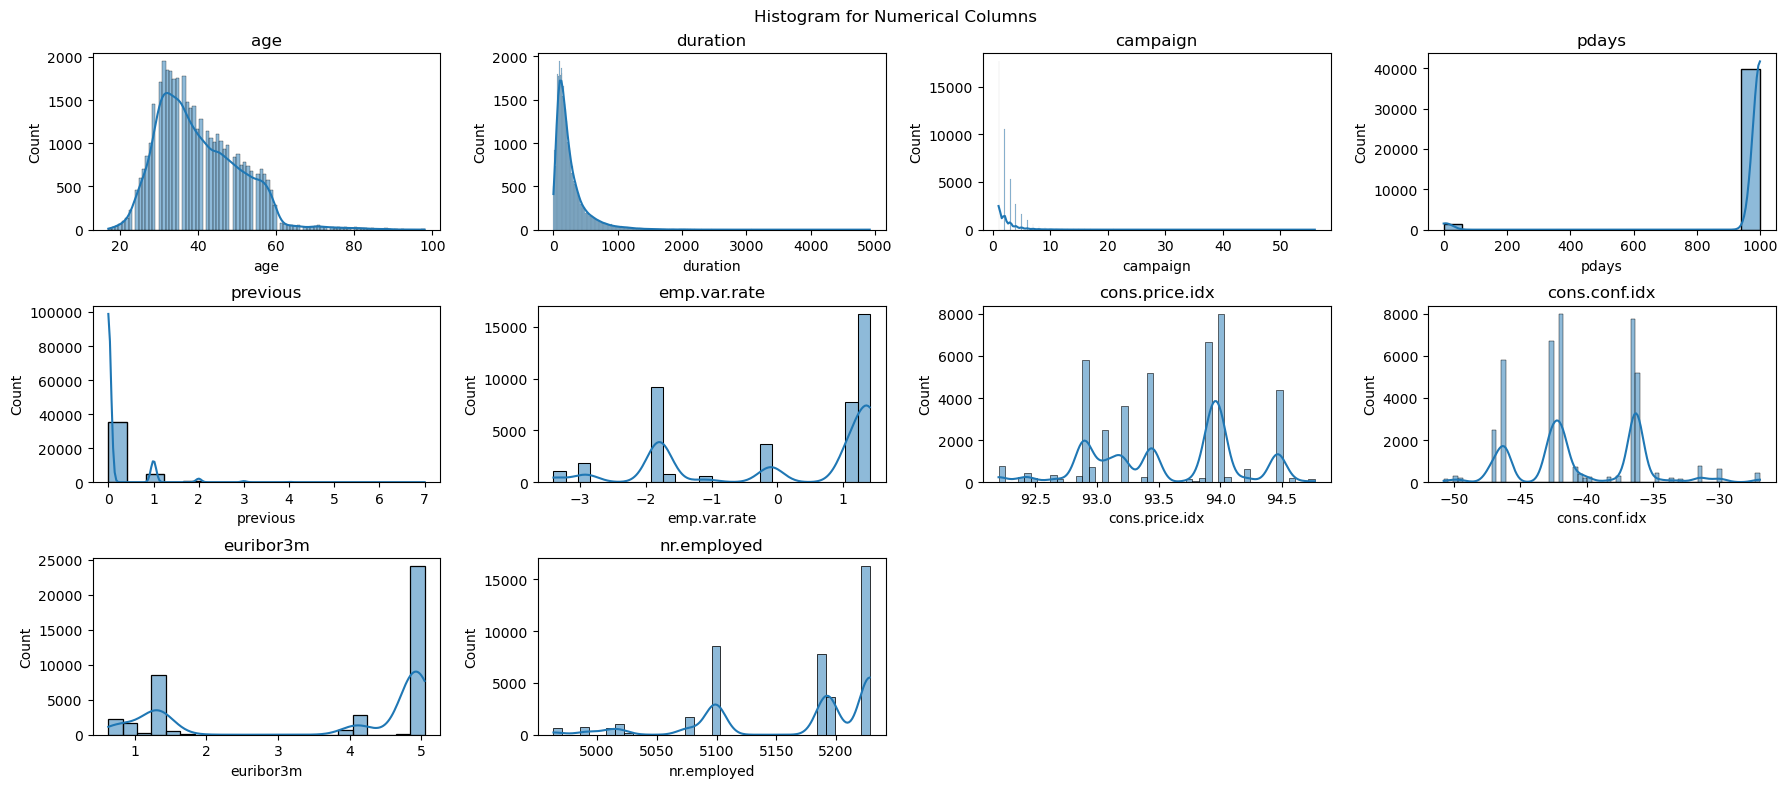

In [7]:
numerical_columns = df_copy.select_dtypes(include='number')

fig, axes = plt.subplots(3, 4, figsize=(18, 8))

axes = axes.flatten()
for i, col in enumerate(numerical_columns):    
    sns.histplot(x=df_copy[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

for i in range(len(numerical_columns.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
fig.subplots_adjust(top=0.925)
plt.suptitle("Histogram for Numerical Columns")
plt.show()

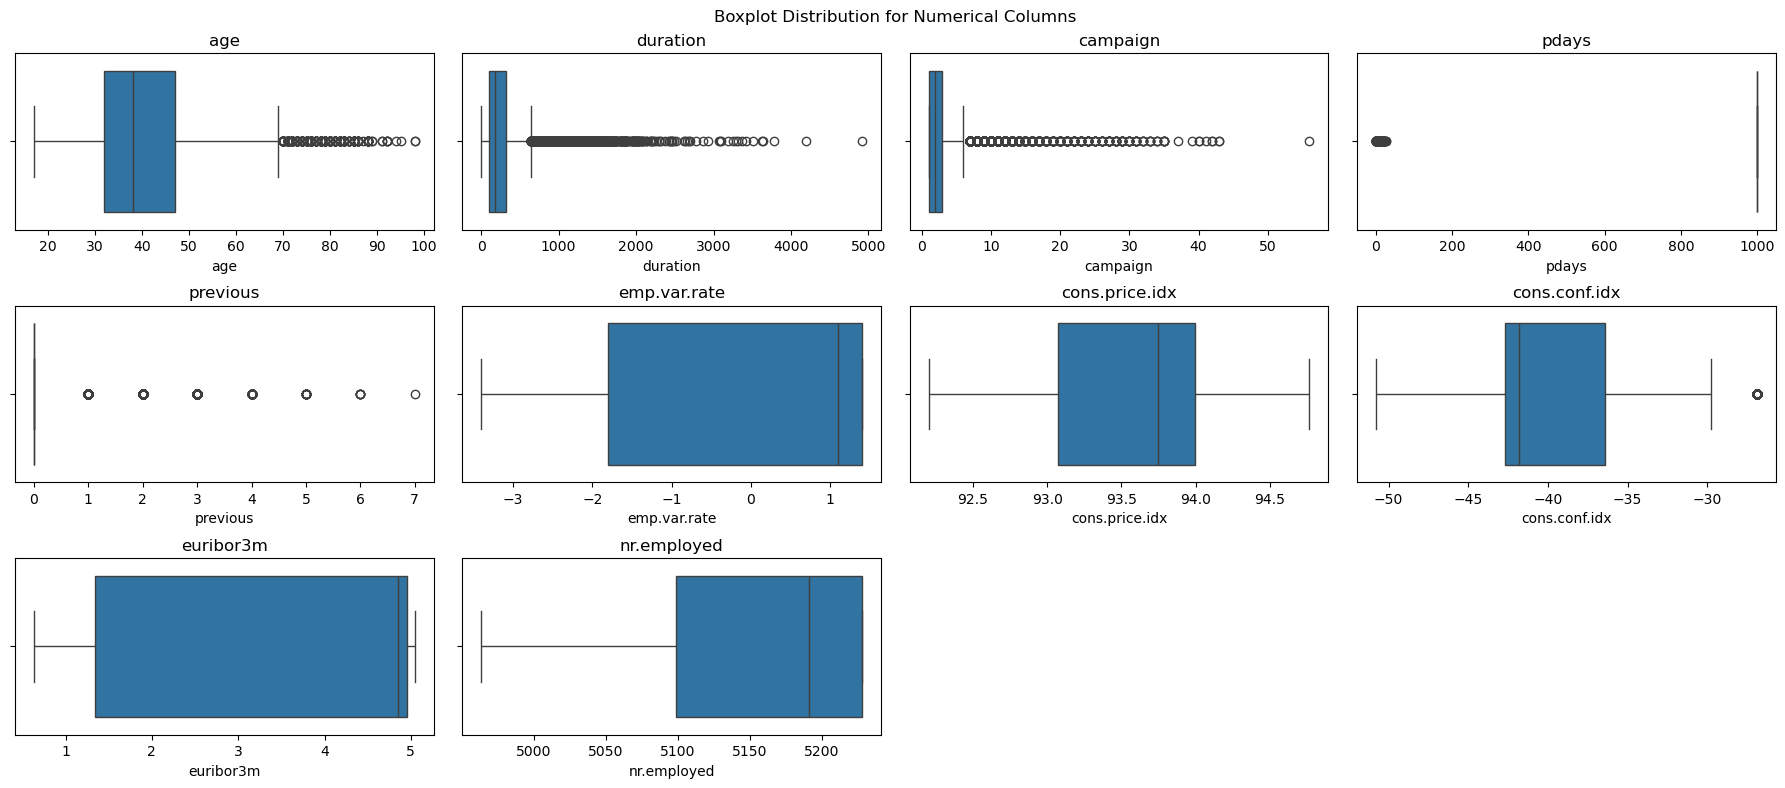

In [8]:
numerical_columns = df_copy.select_dtypes(include='number')

fig, axes = plt.subplots(3, 4, figsize=(18, 8))

axes = axes.flatten()
for i, col in enumerate(numerical_columns):    
    sns.boxplot(x=df_copy[col], ax=axes[i])
    axes[i].set_title(col)

for i in range(len(numerical_columns.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
fig.subplots_adjust(top=0.925)
plt.suptitle("Boxplot Distribution for Numerical Columns")
plt.show()

Histogram above shows the distribution columns meanwhile the Box Plot above shows the outliers of each numerical columns. It seen that almost all of the numerical columns are extremely skewed. Although some numerical columns have no outliers such as `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, and `nr.employed`.

#### **3.1.2. Categorical Distribution**

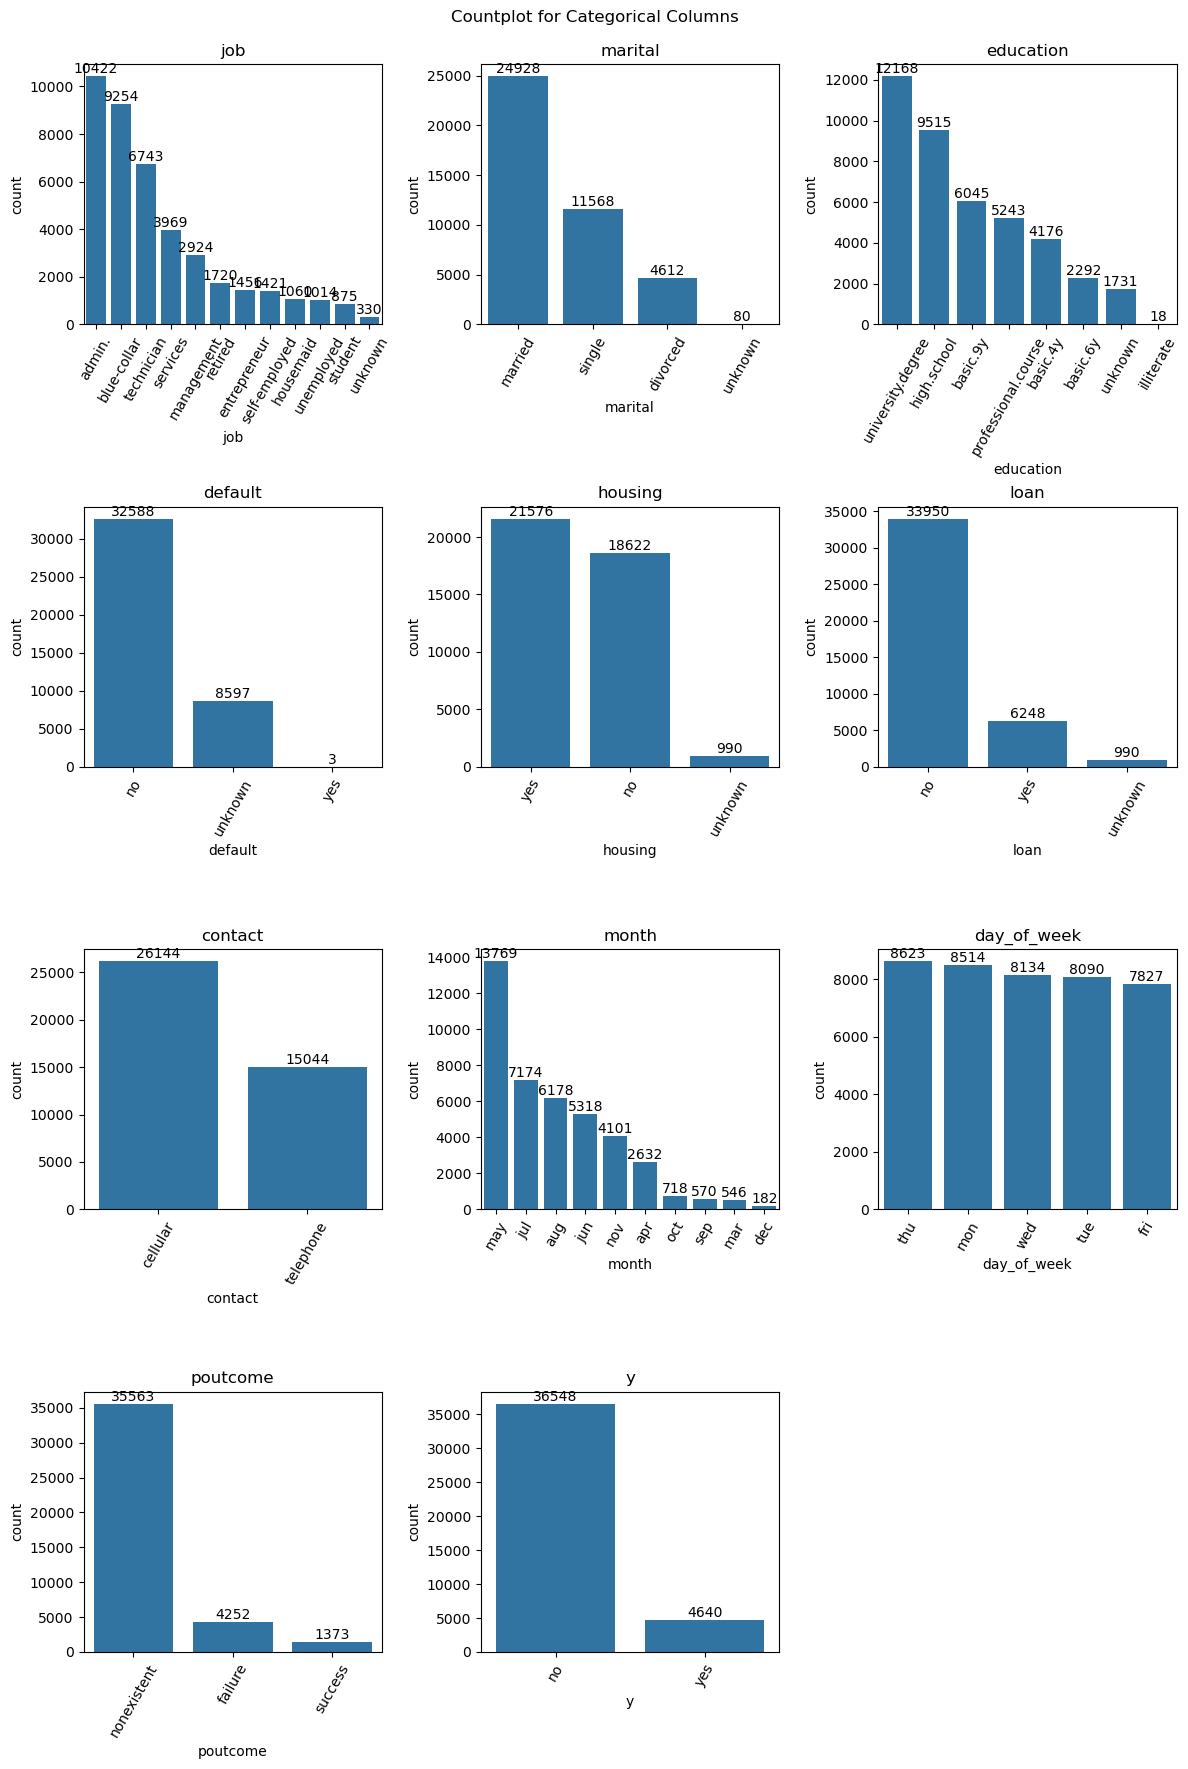

In [9]:
categorical_columns = df_copy.select_dtypes(include='object')

fig, axes = plt.subplots(4, 3, figsize=(12, 18))

axes = axes.flatten()
for i, col in enumerate(categorical_columns):    
    sns.countplot(x=df_copy[col], ax=axes[i], order=df_copy[col].value_counts().index)
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=60)
    for container in axes[i].containers:
        axes[i].bar_label(container)

for i in range(len(categorical_columns.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Countplot for Categorical Columns")
plt.show()

Some of categorical columns have missing value marked with "unknown". It also shown that there is a big value gap in the target variable or `y` column, the percentage of "yes" is only around 5% from the total records. 

#### **3.1.3. Duplicated Values**

In [10]:
df_shape = df_copy.shape

pd.DataFrame({
    "": ["# of Records", "# of Duplicated Records", "% of Duplicated Records"],
    "Value": pd.Series([df_shape[0], df_copy.duplicated().sum(), df_copy.duplicated().sum() / df_shape[0] * 100], dtype="object")
})

,,Value
0,# of Records,41188
1,# of Duplicated Records,12
2,% of Duplicated Records,0.029135


There are 12 records that duplicated, which only made up to around 0.02% of the total records. While this duplicated records will introduce bias to the model, the percentage is also really low.

#### **3.1.4. Missing Values**

Based on the domain knowledge, missing values in the dataset for categorical columns are marked with 
"unknown" label

In [11]:
df_copy = df_copy.applymap(lambda x: np.nan if x == "unknown" else x)

In [12]:
categorical_columns = df_copy.select_dtypes(include='object')

unknown_records_df = pd.DataFrame({
    'Columns': categorical_columns.columns,
    '# of Unknown Record': [categorical_columns[col].isna().sum() for col in categorical_columns.columns],
    "% of Unknown Record": [
        (categorical_columns[col].isna().sum() / categorical_columns[col].count()) * 100 for col in categorical_columns.columns]
})

unknown_records_df[unknown_records_df['# of Unknown Record'] > 0].sort_values(by="% of Unknown Record", ascending=False)

,Columns,# of Unknown Record,% of Unknown Record
3,default,8597,26.378448
2,education,1731,4.387054
4,housing,990,2.462809
5,loan,990,2.462809
0,job,330,0.807675
1,marital,80,0.194609


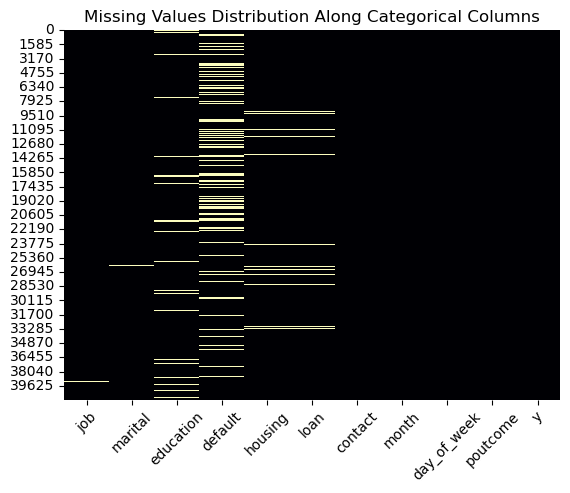

In [13]:
plt.title('Missing Values Distribution Along Categorical Columns')
sns.heatmap(categorical_columns.isna(), cmap='magma', cbar=False)
plt.xticks(rotation=45)
plt.show()

In [14]:
df_copy['default'] = df_copy.apply(lambda X: 'no' if (X['housing'] == "no" and X['loan'] == "no") else X['default'], axis=1)

df_copy['default'].value_counts(dropna=False)

default
no     36047
NaN     5140
yes        1
Name: count, dtype: int64

From domain knowledge, `default` column represents the failure of customers to make repayments. Therefore the missing value type for this column is Missing At Random (MAR) since this column can be explained by `housing` and `loan` columns. Whenever a customer doesn't have `housing` nor `loan`, it unlikely for them to have `default`. Based on this domain knowledge, around 3,400 records in the `default` column has been imputed with "no" value.

#### **3.1.5. Correlation of Numerical Columns**

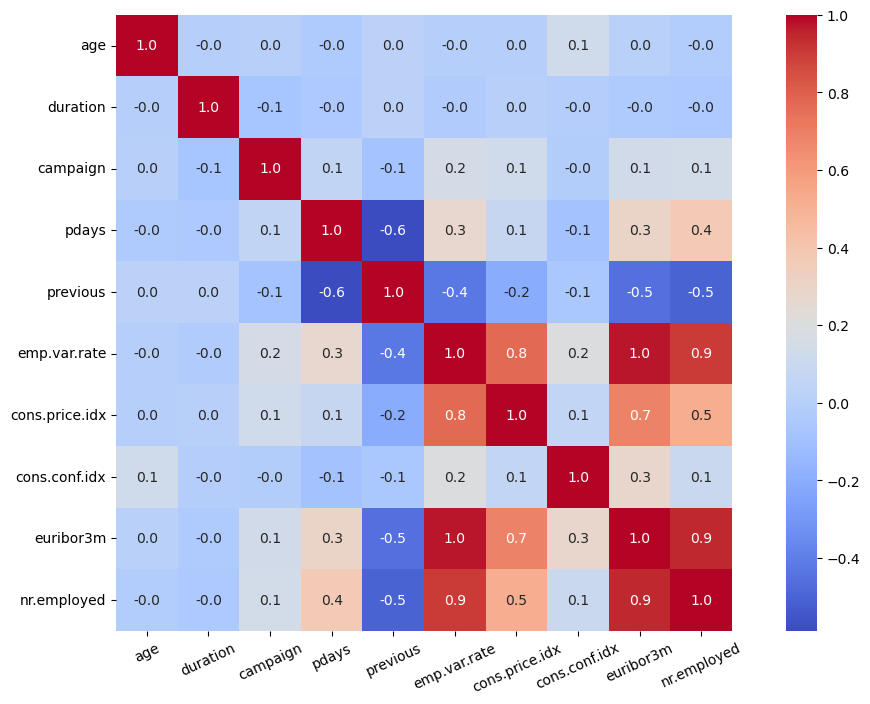

In [15]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_copy.select_dtypes(include=np.number).corr(), cmap='coolwarm', annot=True, fmt=".1f", square=True)
plt.xticks(rotation=25)
plt.show()

From the figure above, shown that there are strong correlation especially in `euribor3m`, `nr.employed`, and `cons.price.idx`. 

### **3.2. Numerical Columns Data towards Target Variable**

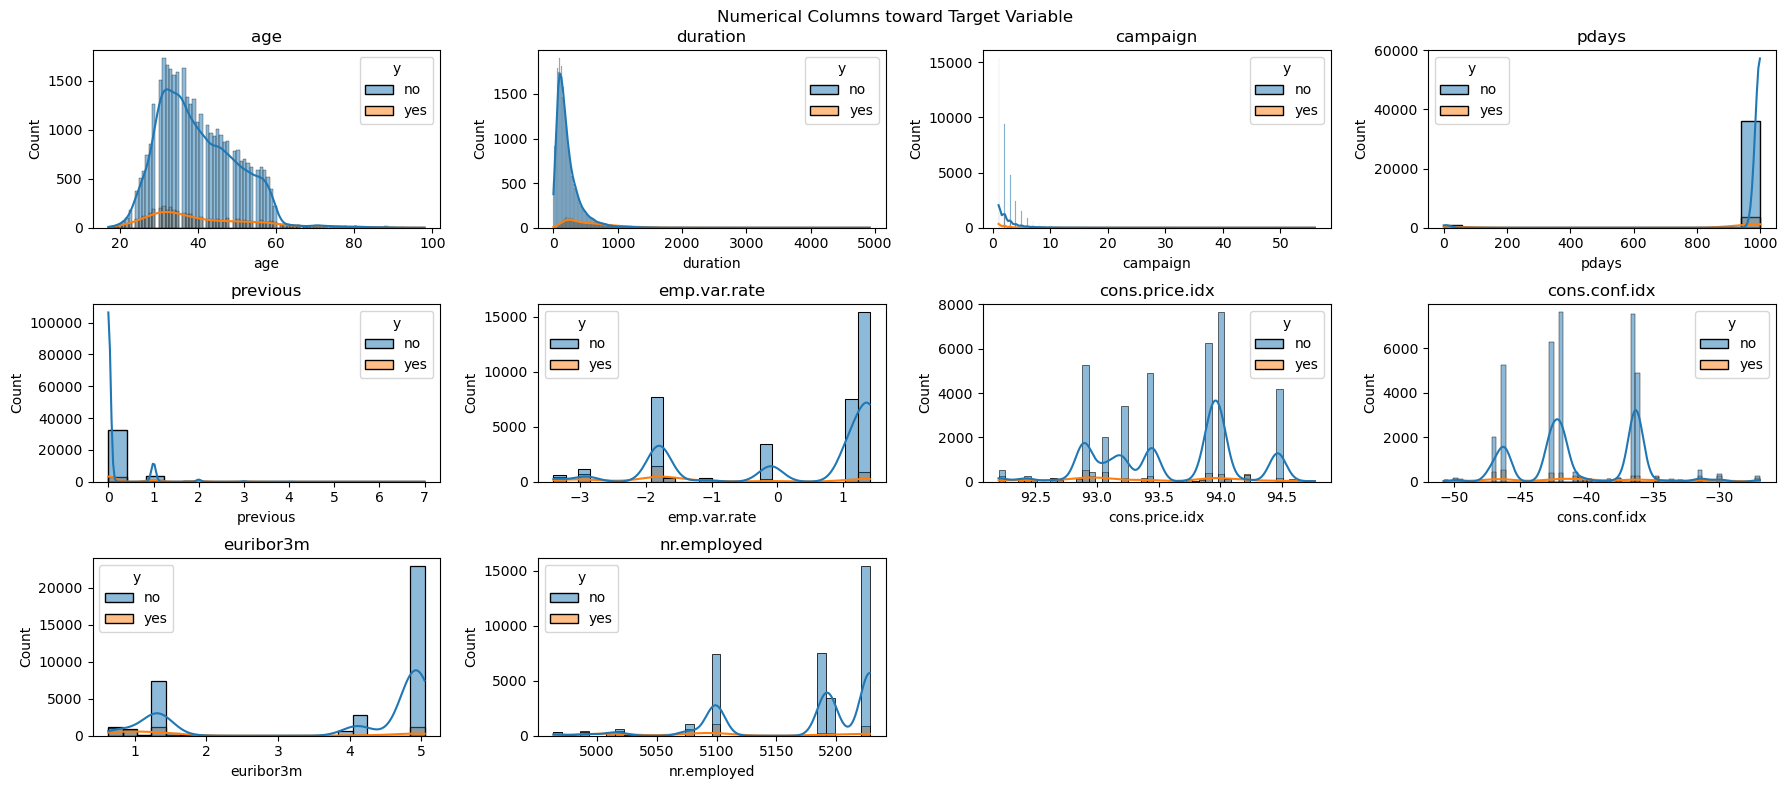

In [16]:
numerical_columns = df_copy.select_dtypes(include='number')

fig, axes = plt.subplots(3, 4, figsize=(18, 8))

axes = axes.flatten()
for i, col in enumerate(numerical_columns):    
    sns.histplot(data=df_copy, x=col, hue='y', kde=True, ax=axes[i])
    axes[i].set_title(col)

for i in range(len(numerical_columns.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.suptitle("Numerical Columns toward Target Variable")
plt.show()

From the figures above, shown that the likelihood of customer with higher `age` and `duration` open a deposit account is also high. Furthermore, the lower `euribor3m` and `nr.employed` value the higher of the likelihood to open a deposit account

### **3.3. Categorical Columns Data towards Target Variable**

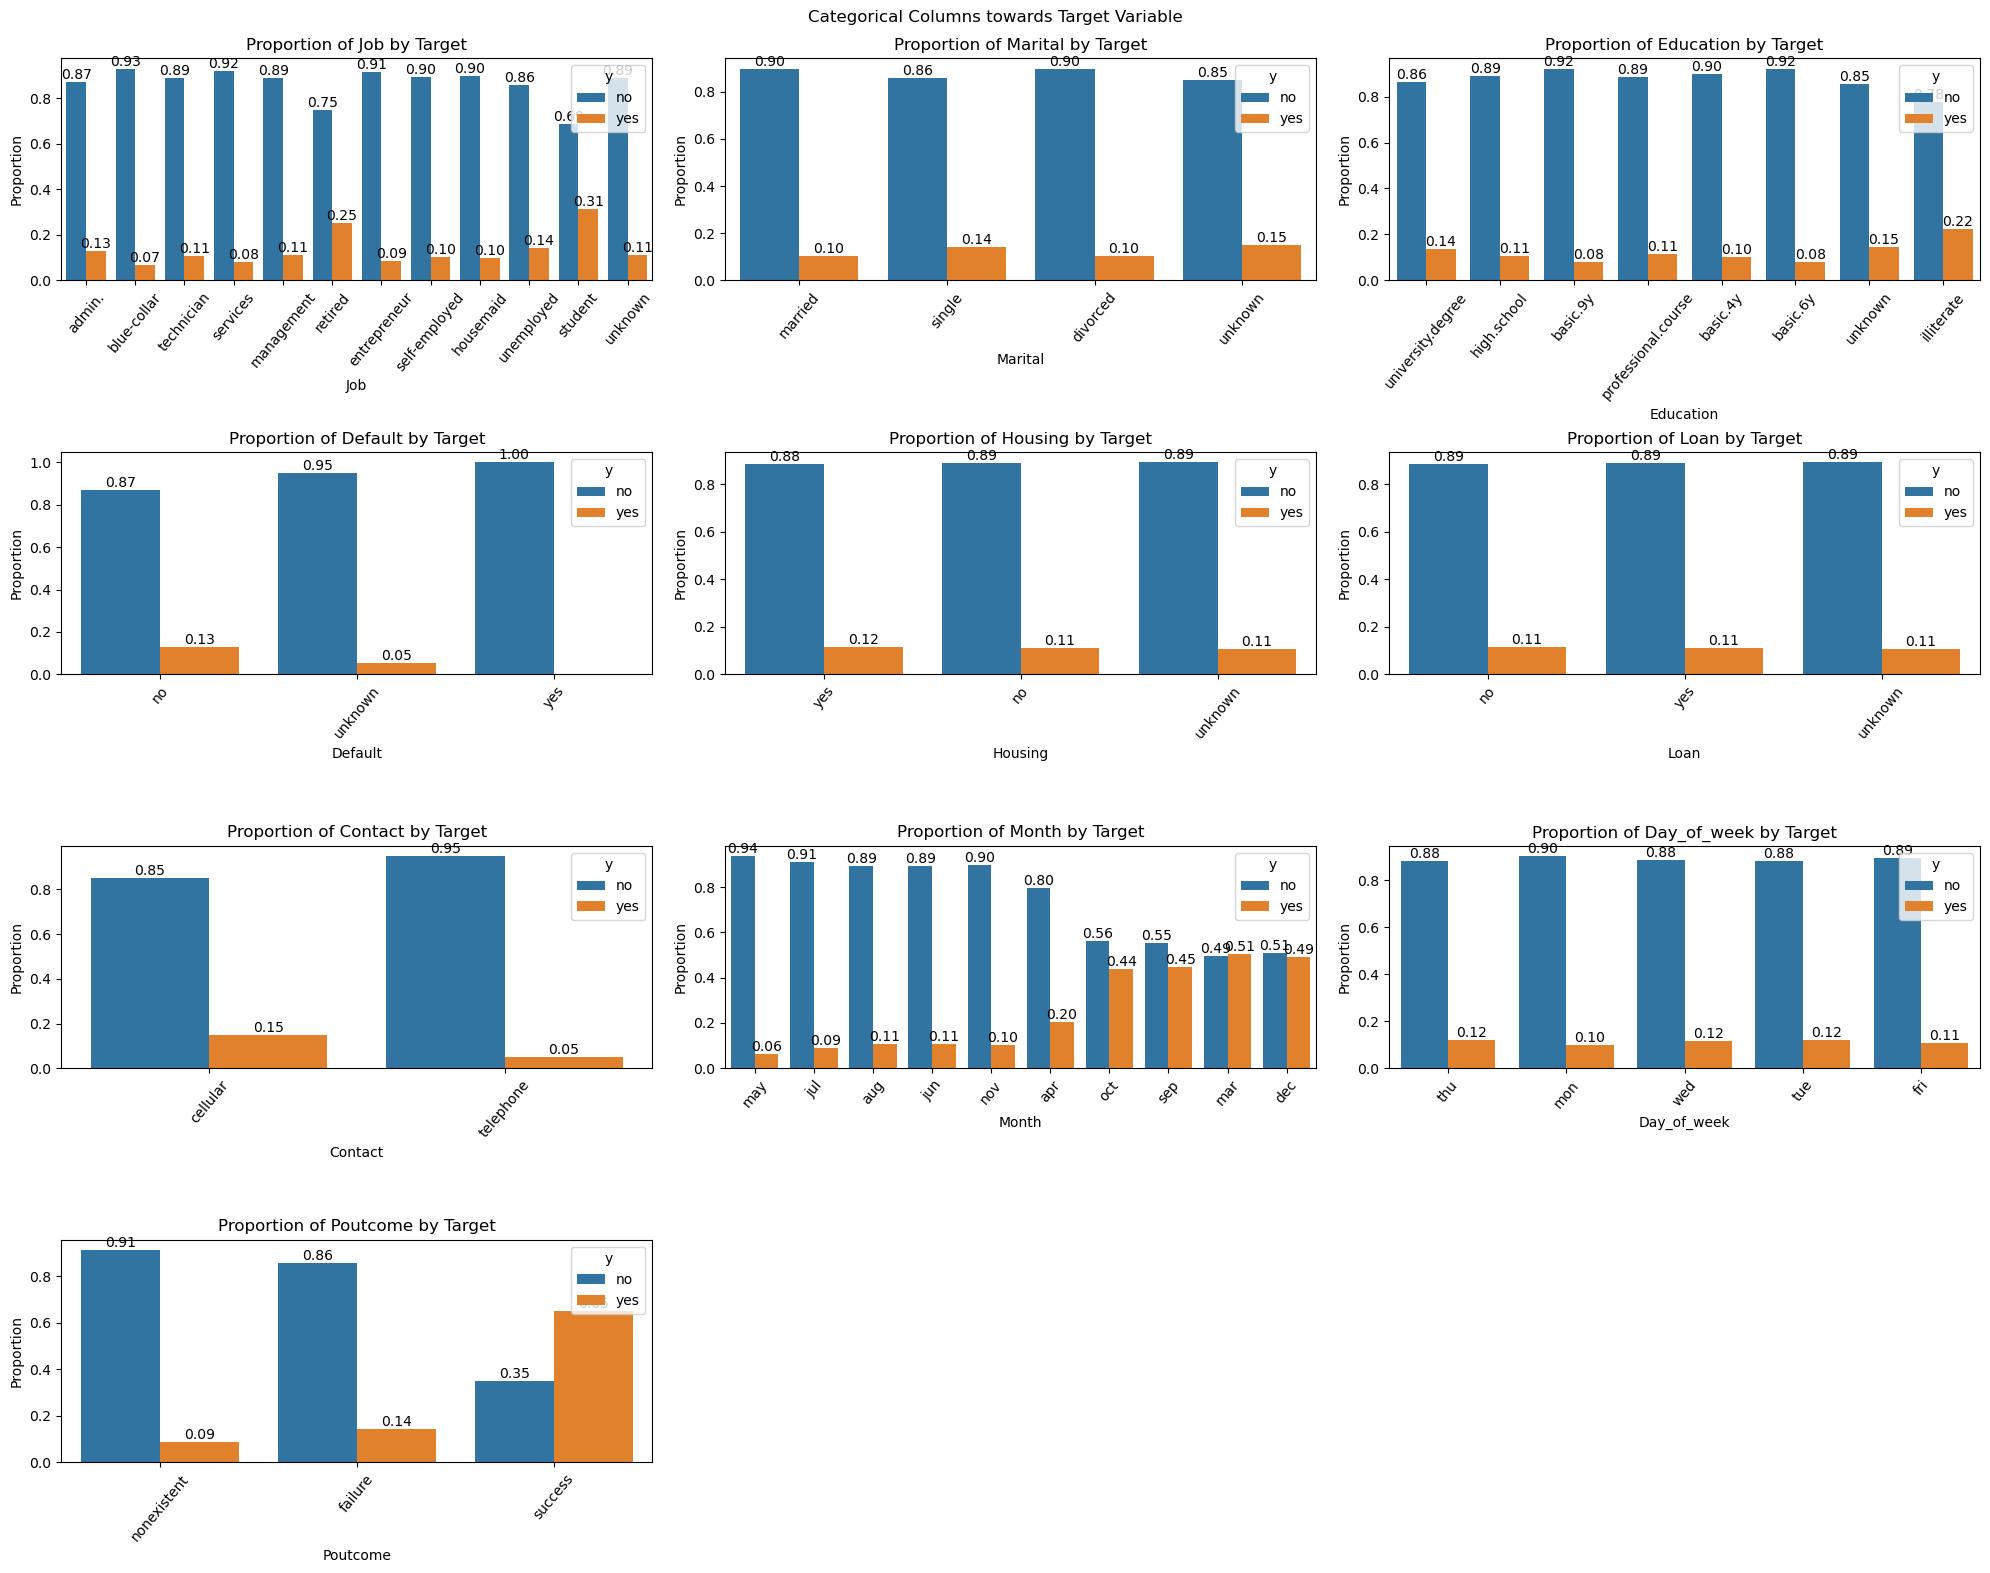

In [17]:
categorical_columns = df_copy.select_dtypes(include='object')

fig, axes = plt.subplots(4, 3, figsize=(20, 16))

axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    if col == 'y': continue
        
    grouped_data = df.groupby([col, 'y']).size().reset_index(name='count')
    total_counts = df[col].value_counts()
    grouped_data['proportion'] = grouped_data.apply(lambda row: row['count'] / total_counts[row[col]], axis=1)
    sns.barplot(data=grouped_data, x=col, y='proportion', hue='y', order=total_counts.index, ax=axes[i])
    
    axes[i].set_title(f'Proportion of {col.capitalize()} by Target')
    axes[i].set_xlabel(f'{col.capitalize()}')
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=50)
    
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt="%.2f")

for i in range(len(numerical_columns.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Categorical Columns towards Target Variable")
plt.show()

Based on `job` column, shown that student have the highest percentage to open a deposit account compared to others which followed by retired job after. Still about the `job` column, "retired" and "unemployed" value kinda have the same meaning, but there's a different in age records since "retired" is more familiar for eldest. Therefore, combining these two columns will result in information loss. 

## **4. Data Preprocessing**

### **4.1. Duplicated Values**

In [18]:
df_copy.drop_duplicates(inplace=True)

### **4.2. Missing Values**

In [19]:
categorical_columns = df_copy.select_dtypes(include='object')
categorical_columns_missing = df_copy.select_dtypes(include='object').isna().sum()

categorical_columns_missing[categorical_columns_missing > 0]

job           330
marital        80
education    1730
default      5140
housing       990
loan          990
dtype: int64

In [20]:
missing_transformer = ColumnTransformer(
    [
        ('missing_imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan), ['job', 'marital', 'education', 'housing', 'loan'])
    ], remainder='passthrough', verbose_feature_names_out=False
).set_output(transform='pandas')

For columns with missing value, imputation with most frequent strategy is used because of its simplicity to handle missing values. In addition that missing value in duration column is not be included in this imputation since it will be handled later on.

### **4.3. Outliers**

In [21]:
numerical_columns = df_copy.select_dtypes(include='number')

def get_lower_upper_bound(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return {'lower_bound': lower_bound, 'upper_bound': upper_bound}


def count_outliers(data):
    results = []
    
    for col in data:
        lower_upper_bound = get_lower_upper_bound(data[col])
        
        outliers_count = ((data[col] < lower_upper_bound['lower_bound']) |
                        (data[col] > lower_upper_bound['upper_bound'])).sum()
        
        results.append({
            "Column": col,
            "Lower Bound": lower_upper_bound['lower_bound'],
            "Upper Bound": lower_upper_bound['upper_bound'],
            "# of Outliers": outliers_count,
            "% of Outliers": outliers_count / data[col].shape[0] * 100
        })
    
    return pd.DataFrame(results)

outliers_df = count_outliers(numerical_columns)
outliers_df[outliers_df['# of Outliers'] > 0].sort_values(by="% of Outliers", ascending=False)

,Column,Lower Bound,Upper Bound,# of Outliers,% of Outliers
4,previous,0.00,0.00,5625,13.661202
1,duration,-223.50,644.50,2963,7.196114
2,campaign,-2.00,6.00,2406,5.843352
3,pdays,999.00,999.00,1515,3.679417
0,age,9.50,69.50,468,1.136612
7,cons.conf.idx,-52.15,-26.95,446,1.083182


In [22]:
outliers_transformer = ColumnTransformer(
    [
        ('outlier_power', PowerTransformer(), ['age', 'campaign', 'previous', 'cons.conf.idx'])
    ], remainder='passthrough', verbose_feature_names_out=False
).set_output(transform='pandas')

As most of the numerical columns are extremely skewed, power transformer method is used since its capability to handle skewed data well and its robustness against outliers. In addition, `pdays` and `duration` columns is not included in this process since it will be handled later on.

### **4.4. Data Preprocessing Pipeline**

In [23]:
preprocessing_pipeline  = Pipeline([
    ("Missing Value", missing_transformer),
    ("Outliers", outliers_transformer),
])

preprocessing_pipeline

Pipeline(steps=[('Missing Value',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('missing_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan'])],
                                   verbose_feature_names_out=False)),
                ('Outliers',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('outlier_power',
                                                  PowerTransformer(),
                                                  ['age', 'campaign',
                                                   'previous',
                                                   'cons.conf.idx'])],
                                   verbose_feature_names_out=False))])

## **5. Feature Engineering**

### **5.1. Data Split**

In [24]:
X = df_copy.drop(columns=['y', 'default', 'duration'])
y = df_copy['y'].apply(lambda x: 1 if x == "yes" else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

As explored in the EDA section before, the value difference gap in the `default` column between 'yes' and 'no' are extreme, with the 'yes' value made up less than 1% of the 'no' value. Therefore, this column will not be included for the modeling. Furthermore, `duration` column represents the previous call duration. Therefore, This column would stays at the minimum value if the call has not been performed in the first place. Based on this knowledge, this column should also not included for the modeling.

### **5.2. Feature Encoding**

In [25]:
encoding_transformer_list = []

#### **5.2.1. pdays Column Bin**

In [26]:
X_train['pdays'].value_counts()

pdays
999    31730
3        343
6        323
4         94
9         50
2         49
12        46
7         46
10        45
5         39
13        33
1         22
15        22
11        21
14        17
8         15
0         13
16         9
17         8
18         6
22         3
26         1
21         1
27         1
19         1
20         1
25         1
Name: count, dtype: int64

In [27]:
def bin_pdays(x):
    return np.where(x < 30, 0, 1)

encoding_transformer_list.append(('pdays_bin', FunctionTransformer(bin_pdays), ['pdays']))

Using the raw records on this `pdays` column will harm the model since the value count gap is extreme between 999 and the rest. Therefore, this column is binned into a categorical column that represents whether the the customer has been contacted for the last 30 days.

#### **5.2.2. Categorical Column**

In [28]:
categorical_columns = X_train.select_dtypes(include='object')

pd.DataFrame({
    "Columns": categorical_columns.columns,
    "# of Unique Values": [categorical_columns[col].nunique() for col in categorical_columns.columns],
    "Unique Values": [categorical_columns[col].unique() for col in categorical_columns.columns],
})

,Columns,# of Unique Values,Unique Values
0,job,11,"[technician, blue-collar, student, admin., management, services, retired, unemployed, self-employed, entrepreneur, housemaid, nan]"
1,marital,3,"[single, married, divorced, nan]"
2,education,7,"[professional.course, university.degree, nan, high.school, basic.4y, basic.9y, basic.6y, illiterate]"
3,housing,2,"[no, yes, nan]"
4,loan,2,"[no, yes, nan]"
5,contact,2,"[cellular, telephone]"
6,month,10,"[jun, may, nov, jul, aug, mar, apr, oct, sep, dec]"
7,day_of_week,5,"[tue, thu, fri, wed, mon]"
8,poutcome,3,"[failure, nonexistent, success]"


In [29]:
encoding_transformer_list.append(('ordinal_encoding',
                                  OrdinalEncoder(categories=[['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']]),
                                  ['education']))

encoding_transformer_list.append(('one_hot_encoding',
                                  OneHotEncoder(drop='first', sparse_output=False),
                                  ['job', 'marital', 'housing', 'loan', 'contact', 'poutcome', 'month', 'day_of_week']))

Encoding method that is applied for each categorical data are:
- Ordinal Encoding : `education`
- One Hot Encoding : `job`, `marital`, `housing`, `loan`, `contact`, `poutcome`, `month`, `day_of_week`

#### **5.2.3. Feature Encoding Transformer**

In [30]:
encoding_transformer = ColumnTransformer(
    encoding_transformer_list, remainder='passthrough', verbose_feature_names_out=False
).set_output(transform='pandas')

### **5.3. Feature Scaling**

In [31]:
scaling_transformer = ColumnTransformer(
    [
        ('standard_scaler', StandardScaler(), ['age', 'campaign', 'previous', 'cons.conf.idx']),
        ('max_abs_scaler', MaxAbsScaler(), ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed'])
    ], remainder='passthrough', verbose_feature_names_out=False
).set_output(transform="pandas")

Power Transformation method was used to handle columns with outliers in the data preprocessing above. Standard Scaler is applied to columns that are close to Gaussian Distribution as the result of the Power Transformation method, as this method transform the columns to resemble the Gaussian Distribution. These columns include `age`, `campaign`, `previous`, `cons.conf.idx`. For the rest, Max Abs Scaler is used since these columns have no outliers but is not close to the Gaussian Distribution. These columns include `emp.var.rate`, `cons.price.idx`, `euribor3m`, `nr.employed`.

### **5.4. Feature Engineering Pipeline**

In [32]:
def rename_columns_encoding(X):
    columns_name = []
    
    for i in range(4):
        if i == 0:
            columns_name += ["Last_Contact_Within_30_Days"]
            continue
        
        columns_name += list(encoding_transformer.transformers_[i][1].get_feature_names_out())
    
    X.columns = columns_name
    return X

rename_transformer_encoding = FunctionTransformer(rename_columns_encoding)

In [33]:
feature_engineering_pipeline = Pipeline([
    ("Feature Encoding", encoding_transformer),
    ("Rename After Encoding", rename_transformer_encoding),
    ("Feature Scaling", scaling_transformer)
])

feature_engineering_pipeline

Pipeline(steps=[('Feature Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pdays_bin',
                                                  FunctionTransformer(func=<function bin_pdays at 0x30cb459e0>),
                                                  ['pdays']),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree']]),
                                                  ['education']),
                                                 ('one_ho...
                 FunctionTransformer(func=<function rename_columns_encoding at 0x30cb45c60>)),
                ('Feature Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'campaign',
                                                   'previous',
                                                   'cons.conf.idx']),
                                                 ('max_abs_scaler',
                                                  MaxAbsScaler(),
                                                  ['emp.var.rate',
                                                   'cons.price.idx',
                                                   'euribor3m',
                                                   'nr.employed'])],
                                   verbose_feature_names_out=False))])

## **6. Modeling**

### **6.1. Data Preparation**

In [34]:
class PipelineWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, pipeline):
        self.pipeline = pipeline

    def fit(self, X, y=None):
        self.pipeline.fit(X, y)
        return self

    def transform(self, X):
        return self.pipeline.transform(X)

In [35]:
preprocessing_step = PipelineWrapper(preprocessing_pipeline)
feature_step = PipelineWrapper(feature_engineering_pipeline)

prep_pipeline = Pipeline([
    ('preprocessing', preprocessing_step),
    ('feature_engineering', feature_step)
])

In [36]:
X_train_encoded = prep_pipeline.fit_transform(X_train)
X_test_encoded = prep_pipeline.fit_transform(X_test)

In [37]:
X_train_encoded.head()

,age,campaign,previous,cons.conf.idx,emp.var.rate,cons.price.idx,euribor3m,nr.employed,Last_Contact_Within_30_Days,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
36454,-1.950631,0.241744,2.513361,-0.006547,-0.852941,0.980964,0.250149,0.970945,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1233,-0.744960,-1.046783,-0.397727,0.912622,0.323529,0.991843,0.962339,0.992904,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24112,-1.449609,-1.046783,-0.397727,-0.275382,-0.029412,0.983465,0.841427,0.993822,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15517,-1.775829,0.241744,-0.397727,-0.435799,0.411765,0.991041,0.982557,1.000000,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17917,0.770247,0.841634,-0.397727,-0.435799,0.411765,0.991041,0.983350,1.000000,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
X_test_encoded.head()

,age,campaign,previous,cons.conf.idx,emp.var.rate,cons.price.idx,euribor3m,nr.employed,Last_Contact_Within_30_Days,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
39049,2.236403,-1.041027,2.516611,1.555224,-0.882353,0.978326,0.141724,0.960865,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11186,1.305498,-1.041027,-0.397983,-0.238501,0.411765,0.996813,0.983350,1.000000,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25302,1.439271,0.257329,-0.397983,-0.283842,-0.029412,0.983465,0.823191,0.993822,1.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
28929,-0.375206,-1.041027,-0.397983,-1.508400,-0.529412,0.982146,0.278494,0.975326,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31094,-0.615637,1.197864,-0.397983,-1.282752,-0.529412,0.980225,0.264420,0.975326,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### **6.2. Modeling**

In [39]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "LGBM Classifier": LGBMClassifier(random_state=42)
}

Model comparison will be done in order to seek for the best model that fits well for this data and case. Algorithm models that will be used as comparison include: `Logistic Regression`, `Decision Tree`, `Random Forest`, `XGBoost`, `Gradient Boosting Classifier`, and `LBGM Classifier`.

#### **6.2.1. Model Benchmark against Raw Data**

In [40]:
benchmark_raw_results = {}

for name, model in models.items():
    score = cross_validate(
        estimator=model,
        X=X_train_encoded,
        y=y_train,
        scoring=['precision', 'recall'],
        cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        return_train_score=True
    )
    
    benchmark_raw_results[name] = {
        "train_precision_mean": score['train_precision'].mean(),
        "train_precision_std": score['train_precision'].std(),
        "test_precision_mean": score['test_precision'].mean(),
        "test_precision_std": score['test_precision'].std(),
        "train_recall_mean": score['train_recall'].mean(),
        "train_recall_std": score['train_recall'].std(),
        "test_recall_mean": score['test_recall'].mean(),
        "test_recall_std": score['test_recall'].std(),
    }

[LightGBM] [Info] Number of positive: 3340, number of negative: 26306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 467
[LightGBM] [Info] Number of data points in the train set: 29646, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112663 -> initscore=-2.063826
[LightGBM] [Info] Start training from score -2.063826
[LightGBM] [Info] Number of positive: 3340, number of negative: 26306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 29646, number of used features: 40
[LightGBM] [Info] [bin

In [41]:
benchmark_raw_precision_df = []
for model, metrics in benchmark_raw_results.items():
    benchmark_raw_precision_df.append({'Model': model, 'Precision': metrics['train_precision_mean'], 'Dataset': 'Train'})
    benchmark_raw_precision_df.append({'Model': model, 'Precision': metrics['test_precision_mean'], 'Dataset': 'Test'})
benchmark_raw_precision_df = pd.DataFrame(benchmark_raw_precision_df)

benchmark_raw_recall_df = []
for model, metrics in benchmark_raw_results.items():
    benchmark_raw_recall_df.append({'Model': model, 'Recall': metrics['train_recall_mean'], 'Dataset': 'Train'})
    benchmark_raw_recall_df.append({'Model': model, 'Recall': metrics['test_recall_mean'], 'Dataset': 'Test'})
benchmark_raw_recall_df = pd.DataFrame(benchmark_raw_recall_df)

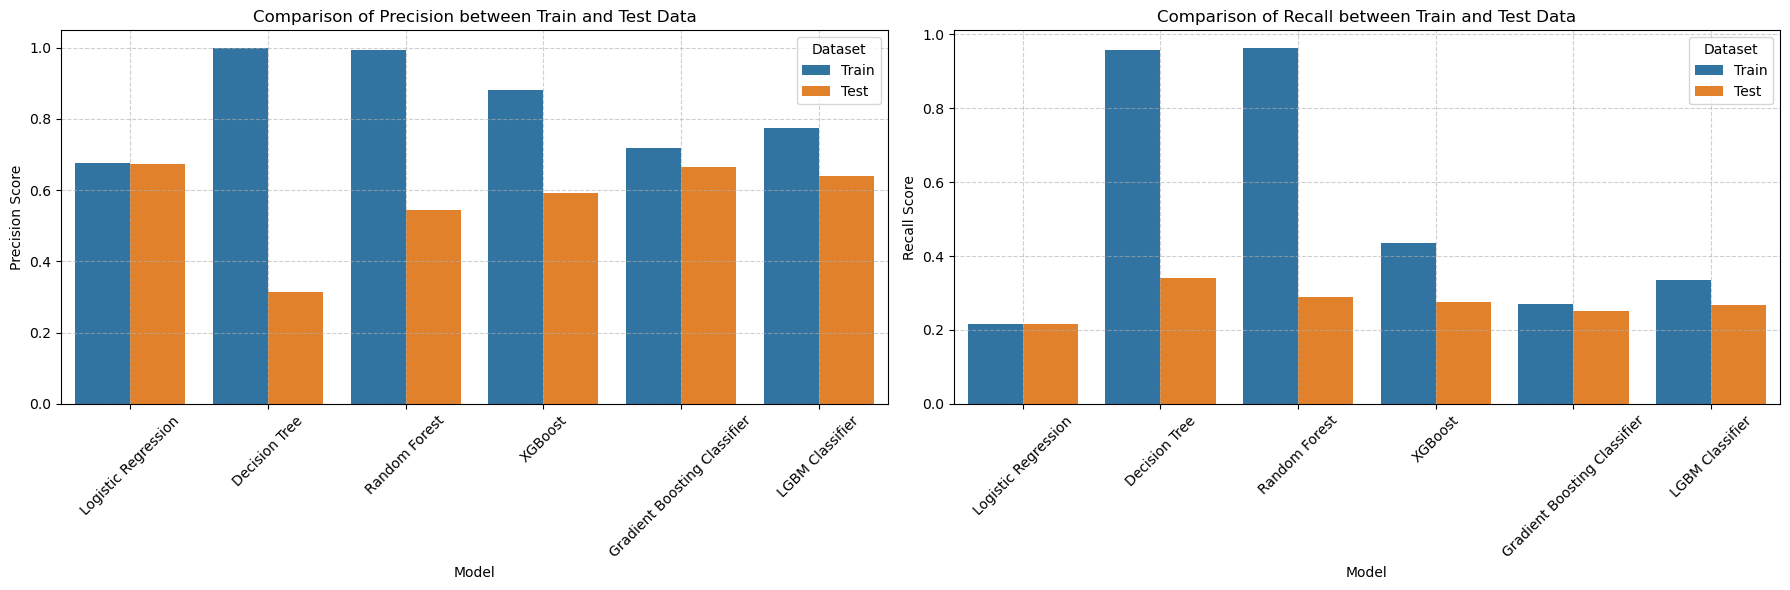

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=benchmark_raw_precision_df, x='Model', y='Precision', hue='Dataset', ax=axes[0])
axes[0].set_ylabel("Precision Score")
axes[0].set_title("Comparison of Precision between Train and Test Data")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.6)

sns.barplot(data=benchmark_raw_recall_df, x='Model', y='Recall', hue='Dataset', ax=axes[1])
axes[1].set_ylabel("Recall Score")
axes[1].set_title("Comparison of Recall between Train and Test Data")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Figure above shows the comparison of Precision and Recall against raw data after data preprocessing and feature engineering. This figure gives some insights include:       
- `Logistic Regression` returns a balanced score in both train and test dataset, this also remains in precision and recall score which shows that this model is neither underfit or overfit. In addition, this model also has the lowest recall score compared to the others.
- `Decision Tree` has the highest score of precision score in train data, as this would gives the biggest revenue, this model has trouble with overfit for both precision and recall score. Therefore, further tuning should be done for this model.
- `Random Forest` also result in extreme overfit fir both precision and recall score, even though its slightly better than `Decision Tree` model since the precision value on test data is higher.
- `XGBoost` also troubled with overfit, even when the the test data precision is higher than both `Decision tree` and `random Forest`.
- `Gradient Boosting Classifier` has a slight overfit on precision, but returns the highest precision score on test data compared to the others.
- `LGBM Classifier` also suffered with overfitting.

#### **6.2.2. Model Benchmark against Oversampled Data**

In [43]:
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X_train_encoded, y_train)

In [44]:
benchmark_resampled_results = {}

for name, model in models.items():
    score = cross_validate(
        estimator=model,
        X=X_resampled,
        y=y_resampled,
        scoring=['precision', 'recall'],
        cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        return_train_score=True
    )
    
    benchmark_resampled_results[name] = {
        "train_precision_mean": score['train_precision'].mean(),
        "train_precision_std": score['train_precision'].std(),
        "test_precision_mean": score['test_precision'].mean(),
        "test_precision_std": score['test_precision'].std(),
        "train_recall_mean": score['train_recall'].mean(),
        "train_recall_std": score['train_recall'].std(),
        "test_recall_mean": score['test_recall'].mean(),
        "test_recall_std": score['test_recall'].std(),
    }

[LightGBM] [Info] Number of positive: 26714, number of negative: 26306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9885
[LightGBM] [Info] Number of data points in the train set: 53020, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503848 -> initscore=0.015391
[LightGBM] [Info] Start training from score 0.015391
[LightGBM] [Info] Number of positive: 26714, number of negative: 26306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9887
[LightGBM] [Info] Number of data points in the train set: 53020, number of used features: 40
[LightGBM] [Info] [b

In [45]:
benchmark_resampled_precision_df = []
for model, metrics in benchmark_resampled_results.items():
    benchmark_resampled_precision_df.append({'Model': model, 'Precision': metrics['train_precision_mean'], 'Dataset': 'Train'})
    benchmark_resampled_precision_df.append({'Model': model, 'Precision': metrics['test_precision_mean'], 'Dataset': 'Test'})
benchmark_resampled_precision_df = pd.DataFrame(benchmark_resampled_precision_df)

benchmark_resampled_recall_df = []
for model, metrics in benchmark_resampled_results.items():
    benchmark_resampled_recall_df.append({'Model': model, 'Recall': metrics['train_recall_mean'], 'Dataset': 'Train'})
    benchmark_resampled_recall_df.append({'Model': model, 'Recall': metrics['test_recall_mean'], 'Dataset': 'Test'})
benchmark_resampled_recall_df = pd.DataFrame(benchmark_resampled_recall_df)

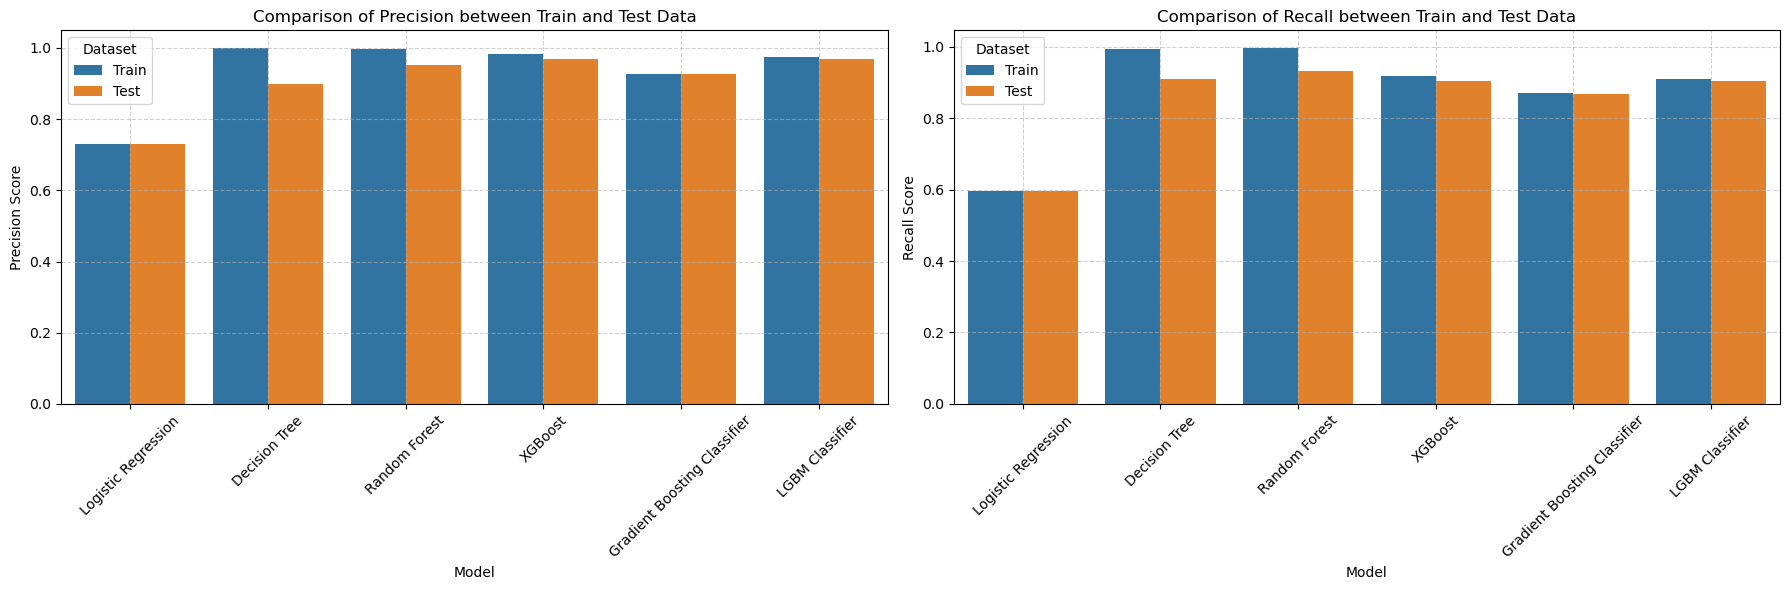

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=benchmark_resampled_precision_df, x='Model', y='Precision', hue='Dataset', ax=axes[0])
axes[0].set_ylabel("Precision Score")
axes[0].set_title("Comparison of Precision between Train and Test Data")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.6)

sns.barplot(data=benchmark_resampled_recall_df, x='Model', y='Recall', hue='Dataset', ax=axes[1])
axes[1].set_ylabel("Recall Score")
axes[1].set_title("Comparison of Recall between Train and Test Data")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Figure above shows the comparison of Precision and Recall against resampled data using adasyn method. This figure gives some insights include:
- `Logistic Regression` remains to have balanced score between train and test data on both precision and recall score. However this model has the lowest precision score compared to the others.
- `Decision Tree` still suffers with overfitting, even though its slightly better compared to the performance against raw data.
- `Random Forest` as the same as `Decision Tree` model, still suffering with overfit even though its improved compared to the performance against raw data.
- `XGBoost` returns  the highest precision score in test data, which mean has the lowest FP amongst the other.
- `Gradient Boosting Classifier` just as balanced as `Logistic Regression` model on precision score, but performs worse on both precision and recall score compared to the `XGBoost` model.
- `LGBM Classifier` performs slightly lower on precision score compared to `XGBoost`, but with more balanced precision and recall score on train and test data.

#### **6.2.3. Model Benchmark against Removed Multicollinearity**

In [47]:
def count_VIF_and_GVIF(X):
    X_train_VIF_score = [variance_inflation_factor(X, i) for i in range(len(X.columns))]

    X_train_VIF_df = pd.DataFrame({
        "Columns": X.columns,
        "VIF": X_train_VIF_score,
        "GVIF": X_train_VIF_score
    })
    
    X_train_nunique_cat = X_train.select_dtypes(include='object').nunique()

    for i, col_name in enumerate(X_train_VIF_df['Columns']):
        for cat_col, nunique in X_train_nunique_cat.items():
            if cat_col in col_name:
                X_train_VIF_df.at[i, "GVIF"] = X_train_VIF_df['VIF'][i] ** (1 / (2 * (nunique - 1)))
                
    return X_train_VIF_df

In [48]:
X_train_VIF_df = count_VIF_and_GVIF(X_resampled)
X_train_VIF_df[X_train_VIF_df['VIF'] > 5].sort_values(by='VIF', ascending=False)

,Columns,VIF,GVIF
25,poutcome_nonexistent,3.651380e+06,4.371337e+01
5,cons.price.idx,1.302318e+06,1.302318e+06
2,previous,6.503545e+05,6.503545e+05
7,nr.employed,5.583086e+05,5.583086e+05
6,euribor3m,6.063547e+02,6.063547e+02
8,Last_Contact_Within_30_Days,2.143073e+02,2.143073e+02
4,emp.var.rate,1.650167e+02,1.650167e+02
26,poutcome_success,1.401978e+01,1.935019e+00
9,education,1.388256e+01,1.245104e+00
27,month_aug,7.660844e+00,1.119764e+00


In [49]:
X_train_VIF = X_resampled.drop(columns=['poutcome_nonexistent'], axis=1)

X_train_VIF_df = count_VIF_and_GVIF(X_train_VIF)
X_train_VIF_df[X_train_VIF_df['VIF'] > 5].sort_values(by='VIF', ascending=False)

,Columns,VIF,GVIF
7,nr.employed,56845.585282,56845.585282
5,cons.price.idx,48548.666200,48548.666200
6,euribor3m,468.493953,468.493953
8,Last_Contact_Within_30_Days,208.186862,208.186862
4,emp.var.rate,77.518627,77.518627
9,education,13.880247,1.245087
25,poutcome_success,13.832472,1.928524
20,marital_married,7.556343,1.657975
26,month_aug,5.960482,1.104260
31,month_may,5.508730,1.099435


In [50]:
X_train_VIF = X_train_VIF.drop(columns=['nr.employed'], axis=1)

X_train_VIF_df = count_VIF_and_GVIF(X_train_VIF)
X_train_VIF_df[X_train_VIF_df['VIF'] > 5].sort_values(by='VIF', ascending=False)

,Columns,VIF,GVIF
5,cons.price.idx,334.640780,334.640780
7,Last_Contact_Within_30_Days,205.473676,205.473676
6,euribor3m,109.298688,109.298688
4,emp.var.rate,26.813230,26.813230
8,education,13.872135,1.245027
24,poutcome_success,13.774220,1.926490
19,marital_married,7.553897,1.657841
30,month_may,5.490981,1.099238
25,month_aug,5.381866,1.098013
20,marital_single,5.073121,1.500786


In [51]:
X_train_VIF = X_train_VIF.drop(columns=['cons.price.idx'], axis=1)

X_train_VIF_df = count_VIF_and_GVIF(X_train_VIF)
X_train_VIF_df[X_train_VIF_df['VIF'] > 5].sort_values(by='VIF', ascending=False)

,Columns,VIF,GVIF
6,Last_Contact_Within_30_Days,92.788134,92.788134
5,euribor3m,90.099452,90.099452
4,emp.var.rate,21.977032,21.977032
7,education,13.101312,1.239109
18,marital_married,7.360108,1.647104
23,poutcome_success,6.471468,1.594963
29,month_may,5.240700,1.096393
24,month_aug,5.058145,1.094235


In [52]:
X_train_VIF = X_train_VIF.drop(columns=['Last_Contact_Within_30_Days'], axis=1)

X_train_VIF_df = count_VIF_and_GVIF(X_train_VIF)
X_train_VIF_df[X_train_VIF_df['VIF'] > 5].sort_values(by='VIF', ascending=False)

,Columns,VIF,GVIF
5,euribor3m,41.372439,41.372439
6,education,12.084023,1.230791
4,emp.var.rate,9.830730,9.830730
17,marital_married,7.143893,1.634872


In [53]:
X_train_VIF = X_train_VIF.drop(columns=['euribor3m'], axis=1)

X_train_VIF_df = count_VIF_and_GVIF(X_train_VIF)
X_train_VIF_df.sort_values(by='VIF', ascending=False)

,Columns,VIF,GVIF
5,education,9.460104,1.205937
16,marital_married,6.329606,1.586150
17,marital_single,4.395996,1.447986
27,month_may,4.131313,1.082000
22,month_aug,3.957030,1.079412
20,contact_telephone,3.585142,1.893447
24,month_jul,3.170281,1.066200
25,month_jun,2.556571,1.053532
4,emp.var.rate,2.528579,2.528579
18,housing_yes,2.304564,1.518079


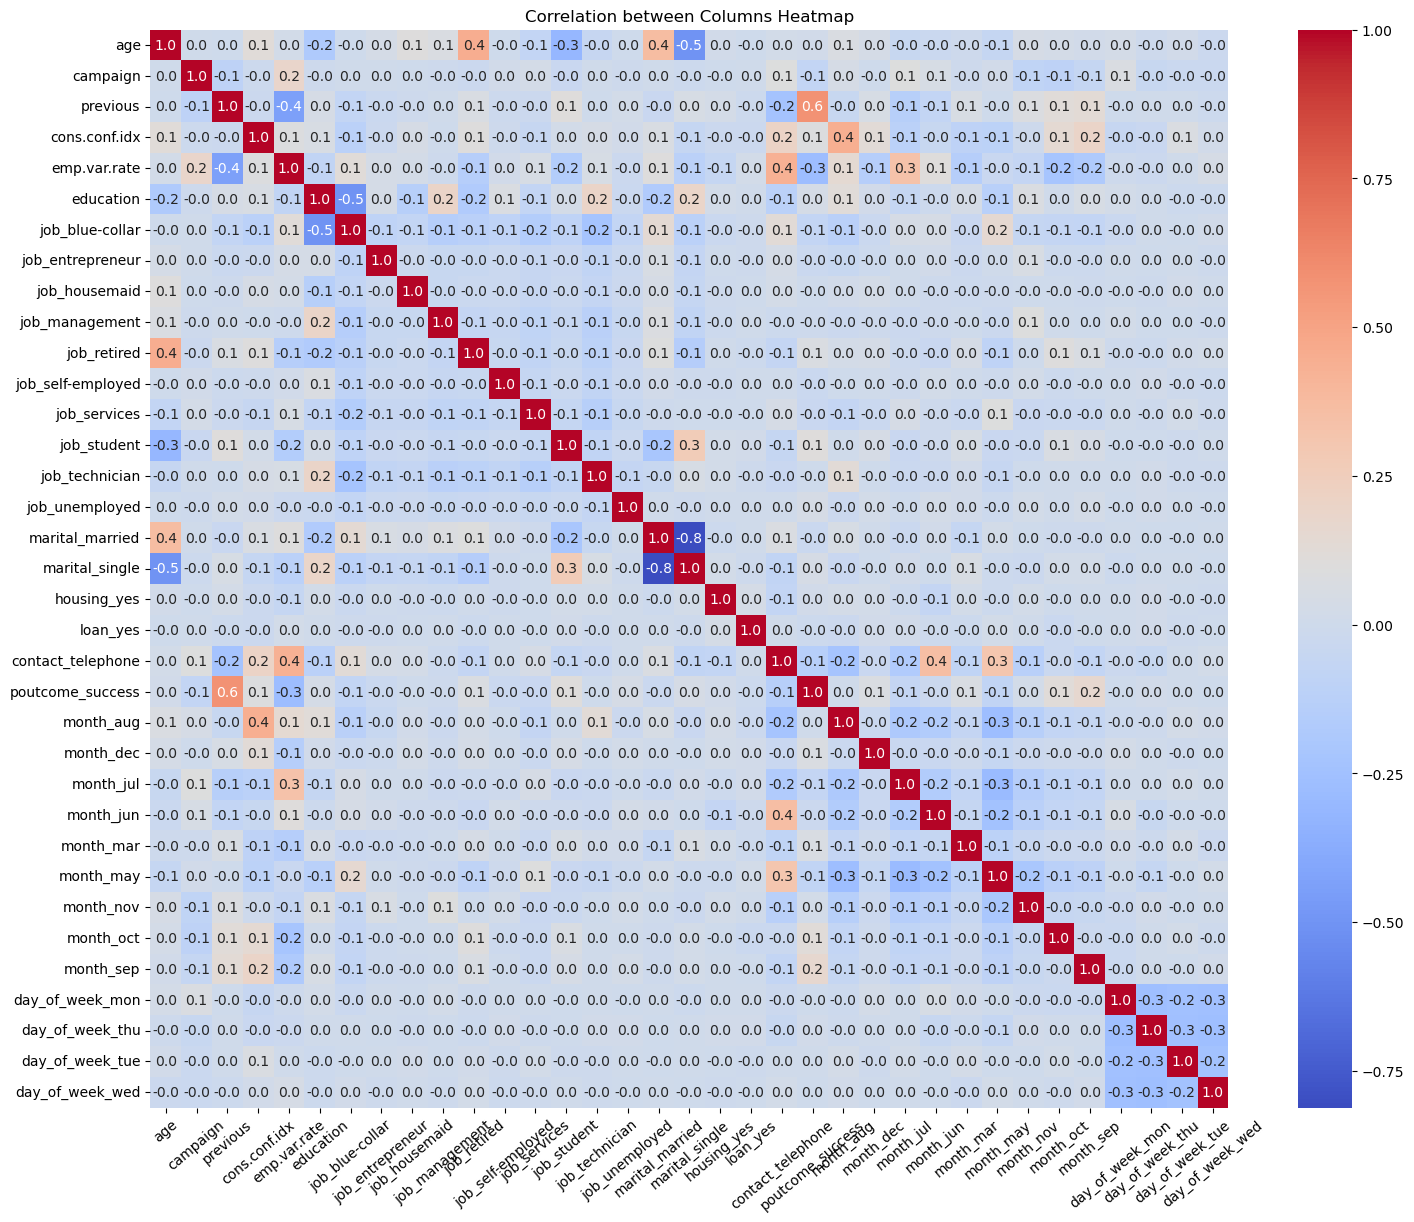

In [54]:
plt.figure(figsize=(18, 14))
sns.heatmap(X_train_VIF.select_dtypes(include=np.number).corr(), cmap='coolwarm', annot=True, fmt=".1f", square=True)
plt.xticks(rotation=40)
plt.title("Correlation between Columns Heatmap")
plt.show()

5 columns with extreme VIF scores has been dropped iteratively, resulting in 35 columns left with the highest VIF score is 9,4. The dropped columns include: `poutcome_nonexistent`, `nr.employed`, `cons.price.idx`, `Last_Contact_Within_30_Days`, and `euribor3m`. It also seen from correlation heatmap above that there is only one column with extreme correlation which is `martial_single` with `martial_married` column. However the rest doesn't have high correlation value.

In [55]:
benchmark_removed_VIF_results = {}

for name, model in models.items():
    score = cross_validate(
        estimator=model,
        X=X_train_VIF,
        y=y_resampled,
        scoring=['precision', 'recall'],
        cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        return_train_score=True
    )
    
    benchmark_removed_VIF_results[name] = {
        "train_precision_mean": score['train_precision'].mean(),
        "train_precision_std": score['train_precision'].std(),
        "test_precision_mean": score['test_precision'].mean(),
        "test_precision_std": score['test_precision'].std(),
        "train_recall_mean": score['train_recall'].mean(),
        "train_recall_std": score['train_recall'].std(),
        "test_recall_mean": score['test_recall'].mean(),
        "test_recall_std": score['test_recall'].std(),
    }

[LightGBM] [Info] Number of positive: 26714, number of negative: 26306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8863
[LightGBM] [Info] Number of data points in the train set: 53020, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503848 -> initscore=0.015391
[LightGBM] [Info] Start training from score 0.015391
[LightGBM] [Info] Number of positive: 26714, number of negative: 26306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8865
[LightGBM] [Info] Number of data points in the train set: 53020, number of used features: 35
[LightGBM] [Info] [b

In [56]:
benchmark_VIF_precision_df = []
for model, metrics in benchmark_removed_VIF_results.items():
    benchmark_VIF_precision_df.append({'Model': model, 'Precision': metrics['train_precision_mean'], 'Dataset': 'Train'})
    benchmark_VIF_precision_df.append({'Model': model, 'Precision': metrics['test_precision_mean'], 'Dataset': 'Test'})
benchmark_VIF_precision_df = pd.DataFrame(benchmark_VIF_precision_df)

benchmark_VIF_recall_df = []
for model, metrics in benchmark_removed_VIF_results.items():
    benchmark_VIF_recall_df.append({'Model': model, 'Recall': metrics['train_recall_mean'], 'Dataset': 'Train'})
    benchmark_VIF_recall_df.append({'Model': model, 'Recall': metrics['test_recall_mean'], 'Dataset': 'Test'})
benchmark_VIF_recall_df = pd.DataFrame(benchmark_VIF_recall_df)

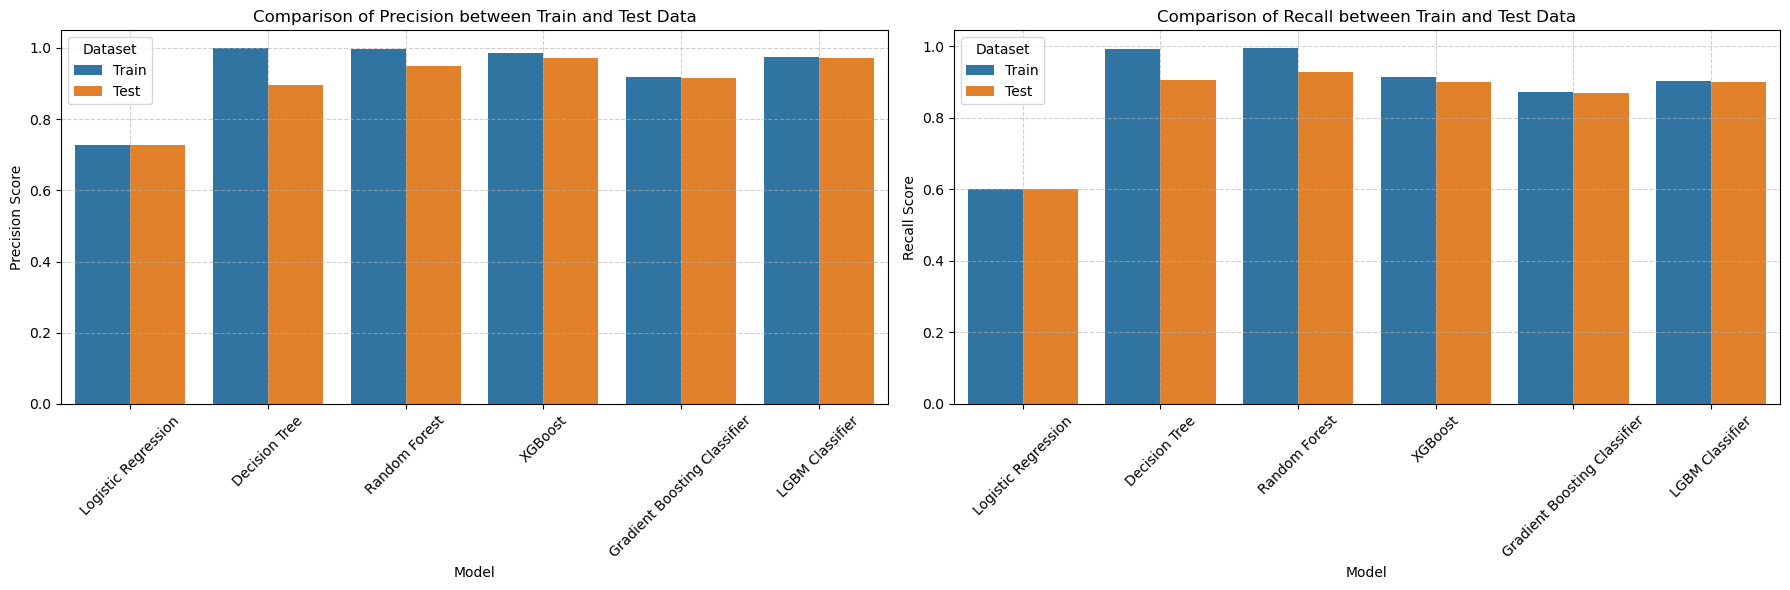

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=benchmark_VIF_precision_df, x='Model', y='Precision', hue='Dataset', ax=axes[0])
axes[0].set_ylabel("Precision Score")
axes[0].set_title("Comparison of Precision between Train and Test Data")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.6)

sns.barplot(data=benchmark_VIF_recall_df, x='Model', y='Recall', hue='Dataset', ax=axes[1])
axes[1].set_ylabel("Recall Score")
axes[1].set_title("Comparison of Recall between Train and Test Data")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Figure above shows the comparison of Precision and Recall against removed multicollinearity data. Generally, this method decreases the performances of each model in most models. However this data approach has successfully increase the precision score of `XGBoost` model. Even when `XGBoost` returns the highest precision score on test data, `LBGM Classifier` returns a more balanced data with only slightly differences on precision score. Therefore, this data approaches will not be used.

#### **6.2.4. Hyperparameter Tuning**

In [58]:
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'f0.5',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'rf']),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.08, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=50),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True)
    }

    model = LGBMClassifier(**params, n_jobs=-1, random_state=42)
    model.fit(
        X_resampled, y_resampled,
        eval_set=[(X_test_encoded, y_test)]
    )

    preds = model.predict(X_test_encoded)
    f05 = fbeta_score(y_test, preds, beta=0.5)

    return f05

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100)

[I 2025-02-20 14:25:34,873] A new study created in memory with name: no-name-744b84fc-fa11-440a-8871-65a5c1f21bb6


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:25:37,072] Trial 0 finished with value: 0.3228800312622118 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013781642084590049, 'n_estimators': 150, 'num_leaves': 32, 'min_child_samples': 15, 'subsample': 0.9330880728874675, 'colsample_bytree': 0.8005575058716043, 'reg_alpha': 0.02358594058414266, 'reg_lambda': 1.5320059381854043e-08}. Best is trial 0 with value: 0.3228800312622118.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:25:37,916] Trial 1 finished with value: 0.33568548387096775 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0022183459467487593, 'n_estimators': 150, 'num_leaves': 44, 'min_child_samples': 57, 'subsample': 0.7159725093210578, 'colsample_bytree': 0.645614570099021, 'reg_alpha': 0.0032112643094417484, 'reg_lambda': 1.8007140198129195e-07}. Best is trial 1 with value: 0.33568548387096775.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:25:39,026] Trial 2 finished with value: 0.3257261410788382 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.031207610012460585, 'n_estimators': 150, 'num_leaves': 61, 'min_child_samples': 63, 'subsample': 0.5232252063599989, 'colsample_bytree': 0.8037724259507192, 'reg_alpha': 3.425445902633376e-07, 'reg_lambda': 3.850031979199519e-08}. Best is trial 1 with value: 0.33568548387096775.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:25:40,620] Trial 3 finished with value: 0.33394985614467737 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0037993334741420037, 'n_estimators': 100, 'num_leaves': 75, 'min_child_samples': 50, 'subsample': 0.5610191174223894, 'colsample_bytree': 0.7475884550556351, 'reg_alpha': 2.039373116525212e-08, 'reg_lambda': 1.5271567592511939}. Best is trial 1 with value: 0.33568548387096775.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:25:47,450] Trial 4 finished with value: 0.29427942794279427 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.009766439040435953, 'n_estimators': 300, 'num_leaves': 34, 'min_child_samples': 98, 'subsample': 0.8875664116805573, 'colsample_bytree': 0.9697494707820946, 'reg_alpha': 1.1309571585271492, 'reg_lambda': 0.002404915432737351}. Best is trial 1 with value: 0.33568548387096775.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:25:48,922] Trial 5 finished with value: 0.33437879401052206 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.001219190586190593, 'n_estimators': 200, 'num_leaves': 51, 'min_child_samples': 34, 'subsample': 0.9143687545759647, 'colsample_bytree': 0.6783766633467947, 'reg_alpha': 3.3760633488778465e-06, 'reg_lambda': 0.0007660634613082907}. Best is trial 1 with value: 0.33568548387096775.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:26:01,222] Trial 6 finished with value: 0.20024901431832332 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.07553263704530351, 'n_estimators': 400, 'num_leaves': 36, 'min_child_samples': 10, 'subsample': 0.9077307142274171, 'colsample_bytree': 0.8534286719238086, 'reg_alpha': 0.0363969097981129, 'reg_lambda': 0.08738424135626989}. Best is trial 1 with value: 0.33568548387096775.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:41:36,485] Trial 7 finished with value: 0.20947959651535994 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.04391000509757802, 'n_estimators': 350, 'num_leaves': 46, 'min_child_samples': 15, 'subsample': 0.6554911608578311, 'colsample_bytree': 0.6625916610133735, 'reg_alpha': 0.03685153691188181, 'reg_lambda': 0.005470376807480385}. Best is trial 1 with value: 0.33568548387096775.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:41:40,178] Trial 8 finished with value: 0.16517576898932831 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.022770313649297175, 'n_estimators': 400, 'num_leaves': 65, 'min_child_samples': 80, 'subsample': 0.7468977981821954, 'colsample_bytree': 0.7613664146909971, 'reg_alpha': 7.04480806377519e-05, 'reg_lambda': 1.6934490731313353e-08}. Best is trial 1 with value: 0.33568548387096775.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:41:42,691] Trial 9 finished with value: 0.353998096144693 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.003965041342313744, 'n_estimators': 300, 'num_leaves': 93, 'min_child_samples': 32, 'subsample': 0.7051914615178149, 'colsample_bytree': 0.8777755692715243, 'reg_alpha': 1.1459970229341322e-06, 'reg_lambda': 4.929685216887945e-08}. Best is trial 9 with value: 0.353998096144693.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:41:46,574] Trial 10 finished with value: 0.31068049490538574 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.004922735409654278, 'n_estimators': 500, 'num_leaves': 97, 'min_child_samples': 36, 'subsample': 0.650282411524673, 'colsample_bytree': 0.507797399829228, 'reg_alpha': 3.4046778781905594e-05, 'reg_lambda': 1.030757695829262e-05}. Best is trial 9 with value: 0.353998096144693.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:41:48,857] Trial 11 finished with value: 0.29954785229841746 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0018197692090297613, 'n_estimators': 250, 'num_leaves': 97, 'min_child_samples': 58, 'subsample': 0.7847293881424954, 'colsample_bytree': 0.9554749187524847, 'reg_alpha': 0.0012479768974604454, 'reg_lambda': 3.2744638865594854e-06}. Best is trial 9 with value: 0.353998096144693.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:41:50,774] Trial 12 finished with value: 0.3018002117896223 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0038320917312949557, 'n_estimators': 250, 'num_leaves': 84, 'min_child_samples': 37, 'subsample': 0.7480206560848572, 'colsample_bytree': 0.5566688186333628, 'reg_alpha': 0.0006417005518461952, 'reg_lambda': 1.2057607733094428e-06}. Best is trial 9 with value: 0.353998096144693.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:41:52,290] Trial 13 finished with value: 0.34186535764375875 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0021174658990907283, 'n_estimators': 500, 'num_leaves': 22, 'min_child_samples': 73, 'subsample': 0.6427823072397868, 'colsample_bytree': 0.8909834660391908, 'reg_alpha': 1.5439346924704781e-06, 'reg_lambda': 3.728329494666714e-07}. Best is trial 9 with value: 0.353998096144693.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:41:53,680] Trial 14 finished with value: 0.34186535764375875 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0061067371655028745, 'n_estimators': 500, 'num_leaves': 20, 'min_child_samples': 77, 'subsample': 0.6286191428179753, 'colsample_bytree': 0.8993163368712944, 'reg_alpha': 4.049135179406257e-07, 'reg_lambda': 5.435581952968747e-05}. Best is trial 9 with value: 0.353998096144693.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:41:56,513] Trial 15 finished with value: 0.3547776726584674 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.002331918581924779, 'n_estimators': 400, 'num_leaves': 81, 'min_child_samples': 75, 'subsample': 0.8234025304333105, 'colsample_bytree': 0.8835567897237544, 'reg_alpha': 1.1520262514391835e-08, 'reg_lambda': 5.162482909859435e-07}. Best is trial 15 with value: 0.3547776726584674.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:01,683] Trial 16 finished with value: 0.37922906267332224 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0010790180146906284, 'n_estimators': 400, 'num_leaves': 84, 'min_child_samples': 86, 'subsample': 0.8352576416206678, 'colsample_bytree': 0.9941025495954319, 'reg_alpha': 1.757807193950478e-08, 'reg_lambda': 4.688118260572141e-05}. Best is trial 16 with value: 0.37922906267332224.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:06,089] Trial 17 finished with value: 0.37580818965517243 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0010121526175780973, 'n_estimators': 400, 'num_leaves': 76, 'min_child_samples': 92, 'subsample': 0.8255044162944255, 'colsample_bytree': 0.9819567568207757, 'reg_alpha': 1.878456003581446e-08, 'reg_lambda': 4.931546560867639e-05}. Best is trial 16 with value: 0.37922906267332224.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:11,063] Trial 18 finished with value: 0.38374076179647526 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0012407786816077727, 'n_estimators': 450, 'num_leaves': 67, 'min_child_samples': 96, 'subsample': 0.9805335397538661, 'colsample_bytree': 0.9968394467622057, 'reg_alpha': 6.479872737032061e-08, 'reg_lambda': 6.638897612970331e-05}. Best is trial 18 with value: 0.38374076179647526.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:15,499] Trial 19 finished with value: 0.3614609571788413 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0013907972761651622, 'n_estimators': 450, 'num_leaves': 67, 'min_child_samples': 90, 'subsample': 0.9974305210651948, 'colsample_bytree': 0.9308268337113126, 'reg_alpha': 1.2827521170024873e-07, 'reg_lambda': 7.538863824951711e-05}. Best is trial 18 with value: 0.38374076179647526.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:20,571] Trial 20 finished with value: 0.311411149825784 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0010060991581705603, 'n_estimators': 450, 'num_leaves': 87, 'min_child_samples': 100, 'subsample': 0.980935838859599, 'colsample_bytree': 0.9857760722939312, 'reg_alpha': 1.406353943041419e-05, 'reg_lambda': 0.028214456422822446}. Best is trial 18 with value: 0.38374076179647526.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:24,686] Trial 21 finished with value: 0.38946162657502864 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0010520147339723022, 'n_estimators': 350, 'num_leaves': 72, 'min_child_samples': 88, 'subsample': 0.8447961717292373, 'colsample_bytree': 0.9963830171490181, 'reg_alpha': 5.239033799790557e-08, 'reg_lambda': 0.00010613503183923811}. Best is trial 21 with value: 0.38946162657502864.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:28,351] Trial 22 finished with value: 0.3816006600660066 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0016455581811205707, 'n_estimators': 350, 'num_leaves': 71, 'min_child_samples': 83, 'subsample': 0.8391245252732021, 'colsample_bytree': 0.9320176626045472, 'reg_alpha': 9.631455563635607e-08, 'reg_lambda': 0.00036688825714886985}. Best is trial 21 with value: 0.38946162657502864.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:32,338] Trial 23 finished with value: 0.3830756488128106 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0016206725207483623, 'n_estimators': 350, 'num_leaves': 70, 'min_child_samples': 84, 'subsample': 0.8662718798475563, 'colsample_bytree': 0.9477548858851635, 'reg_alpha': 6.366149766878075e-08, 'reg_lambda': 0.0007740166148911084}. Best is trial 21 with value: 0.38946162657502864.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:36,109] Trial 24 finished with value: 0.3481927710843373 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.003129950765117961, 'n_estimators': 350, 'num_leaves': 53, 'min_child_samples': 93, 'subsample': 0.960868293834536, 'colsample_bytree': 0.9317790437018889, 'reg_alpha': 1.157086722243122e-07, 'reg_lambda': 0.014181513759272377}. Best is trial 21 with value: 0.38946162657502864.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:39,933] Trial 25 finished with value: 0.33015768725361366 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.007392007339050774, 'n_estimators': 450, 'num_leaves': 59, 'min_child_samples': 67, 'subsample': 0.8543131918673497, 'colsample_bytree': 0.8382196791841091, 'reg_alpha': 4.337402076748668e-06, 'reg_lambda': 0.26054202221276}. Best is trial 21 with value: 0.38946162657502864.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:42,436] Trial 26 finished with value: 0.3996201052016365 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0026684182746239335, 'n_estimators': 250, 'num_leaves': 75, 'min_child_samples': 86, 'subsample': 0.8812829080304145, 'colsample_bytree': 0.9964085856130196, 'reg_alpha': 6.14428601795186, 'reg_lambda': 0.0013658322357602002}. Best is trial 26 with value: 0.3996201052016365.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:45,492] Trial 27 finished with value: 0.4287287602265576 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0028055793864649667, 'n_estimators': 250, 'num_leaves': 76, 'min_child_samples': 67, 'subsample': 0.9470938598958915, 'colsample_bytree': 0.9136992041084335, 'reg_alpha': 8.360184885079113, 'reg_lambda': 7.165602948033355e-06}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:48,098] Trial 28 finished with value: 0.32218597063621535 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0028525658651017195, 'n_estimators': 250, 'num_leaves': 78, 'min_child_samples': 70, 'subsample': 0.7969642706115267, 'colsample_bytree': 0.912245068420218, 'reg_alpha': 8.232584540622799, 'reg_lambda': 7.740469471377633e-06}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:52,356] Trial 29 finished with value: 0.3248762376237624 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.012038762374584335, 'n_estimators': 300, 'num_leaves': 90, 'min_child_samples': 49, 'subsample': 0.9381000710126259, 'colsample_bytree': 0.8266823056276795, 'reg_alpha': 0.3618646050166252, 'reg_lambda': 0.0025244715620066213}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:42:59,940] Trial 30 finished with value: 0.3245240988254354 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.005528759101362155, 'n_estimators': 250, 'num_leaves': 61, 'min_child_samples': 66, 'subsample': 0.9430786309426253, 'colsample_bytree': 0.759359978569621, 'reg_alpha': 3.433789486206162, 'reg_lambda': 0.00019504085166970533}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:03,671] Trial 31 finished with value: 0.37735849056603776 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0026921324851593834, 'n_estimators': 300, 'num_leaves': 74, 'min_child_samples': 94, 'subsample': 0.881817446280543, 'colsample_bytree': 0.9992483437747105, 'reg_alpha': 0.24830333112483277, 'reg_lambda': 2.069665731501832e-05}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:06,098] Trial 32 finished with value: 0.38196359624931053 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0014217646480433953, 'n_estimators': 200, 'num_leaves': 68, 'min_child_samples': 86, 'subsample': 0.9620135739247112, 'colsample_bytree': 0.9645056135057763, 'reg_alpha': 0.16275914608040867, 'reg_lambda': 0.00018391753461529775}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:08,026] Trial 33 finished with value: 0.36127895266868076 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0022481537804197958, 'n_estimators': 200, 'num_leaves': 55, 'min_child_samples': 79, 'subsample': 0.9082974047990474, 'colsample_bytree': 0.9982954243624945, 'reg_alpha': 9.745263069857595, 'reg_lambda': 2.5938192777454127e-06}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:09,270] Trial 34 finished with value: 0.37901469787697334 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0017362454152758935, 'n_estimators': 150, 'num_leaves': 64, 'min_child_samples': 89, 'subsample': 0.9959782326816241, 'colsample_bytree': 0.9396246117561873, 'reg_alpha': 1.6050258853963741, 'reg_lambda': 1.191639277962282e-05}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:10,499] Trial 35 finished with value: 0.3647180548370409 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0013371214187278733, 'n_estimators': 100, 'num_leaves': 81, 'min_child_samples': 97, 'subsample': 0.9243533775563069, 'colsample_bytree': 0.9616391439886885, 'reg_alpha': 0.005390611105199787, 'reg_lambda': 0.0017549019593713793}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:13,058] Trial 36 finished with value: 0.3244466800804829 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0033021727044633665, 'n_estimators': 200, 'num_leaves': 73, 'min_child_samples': 58, 'subsample': 0.8847889997110061, 'colsample_bytree': 0.7087124905867132, 'reg_alpha': 0.0056983548785039815, 'reg_lambda': 9.722286010927547}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:24,569] Trial 37 finished with value: 0.31589801274840645 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0020417279682286224, 'n_estimators': 300, 'num_leaves': 78, 'min_child_samples': 48, 'subsample': 0.9597775068146595, 'colsample_bytree': 0.6105383180192651, 'reg_alpha': 0.6759193998482772, 'reg_lambda': 0.005677770164841137}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:26,510] Trial 38 finished with value: 0.3447903156074362 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.004291652627621973, 'n_estimators': 250, 'num_leaves': 60, 'min_child_samples': 99, 'subsample': 0.9005912277250283, 'colsample_bytree': 0.785124803408521, 'reg_alpha': 2.977018271413853, 'reg_lambda': 0.00046828855275520486}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:29,472] Trial 39 finished with value: 0.3241341991341991 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.00917246073328697, 'n_estimators': 150, 'num_leaves': 47, 'min_child_samples': 62, 'subsample': 0.7944450186202359, 'colsample_bytree': 0.9178167956126121, 'reg_alpha': 0.042358109106932204, 'reg_lambda': 2.8538023388998958e-06}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:31,697] Trial 40 finished with value: 0.3675 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.01647223396104617, 'n_estimators': 300, 'num_leaves': 39, 'min_child_samples': 81, 'subsample': 0.5133251848628693, 'colsample_bytree': 0.8694012728202581, 'reg_alpha': 3.42885657685318e-07, 'reg_lambda': 0.00013686580690875917}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:35,032] Trial 41 finished with value: 0.38461538461538464 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0015345817216566643, 'n_estimators': 350, 'num_leaves': 70, 'min_child_samples': 85, 'subsample': 0.8654107358995321, 'colsample_bytree': 0.9695888943829218, 'reg_alpha': 4.044415502791478e-08, 'reg_lambda': 0.0016132747176001428}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:38,156] Trial 42 finished with value: 0.38196359624931053 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0011533687436188378, 'n_estimators': 350, 'num_leaves': 66, 'min_child_samples': 88, 'subsample': 0.8620401330346618, 'colsample_bytree': 0.9702587279184685, 'reg_alpha': 0.00013715278764651637, 'reg_lambda': 0.0010855330182584079}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:42,326] Trial 43 finished with value: 0.38171140939597314 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0013883506588230421, 'n_estimators': 450, 'num_leaves': 71, 'min_child_samples': 96, 'subsample': 0.9307409629643457, 'colsample_bytree': 0.9728391715646566, 'reg_alpha': 4.186782439984796e-08, 'reg_lambda': 0.004956116647266243}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:45,286] Trial 44 finished with value: 0.2729456593770709 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0025959594701338413, 'n_estimators': 350, 'num_leaves': 57, 'min_child_samples': 75, 'subsample': 0.7741526560328441, 'colsample_bytree': 0.9517626467078988, 'reg_alpha': 8.061184440698722e-07, 'reg_lambda': 0.04215327955791094}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:47,505] Trial 45 finished with value: 0.34511385199240985 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0018089863788168475, 'n_estimators': 250, 'num_leaves': 62, 'min_child_samples': 71, 'subsample': 0.9707909646740932, 'colsample_bytree': 0.9112524286672543, 'reg_alpha': 8.252925718408914e-06, 'reg_lambda': 2.9025291588728373e-05}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:51,318] Trial 46 finished with value: 0.38584538375973304 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.049648787172900735, 'n_estimators': 300, 'num_leaves': 80, 'min_child_samples': 44, 'subsample': 0.8941802978857131, 'colsample_bytree': 0.9765673839247353, 'reg_alpha': 1.8667858697570321e-07, 'reg_lambda': 0.11375208371959285}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:43:54,885] Trial 47 finished with value: 0.3337299870186067 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.05781503398187661, 'n_estimators': 300, 'num_leaves': 82, 'min_child_samples': 44, 'subsample': 0.7189104997261302, 'colsample_bytree': 0.8608216505938876, 'reg_alpha': 2.2878447530966846e-07, 'reg_lambda': 0.23050947961411022}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:07,921] Trial 48 finished with value: 0.2293848167539267 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.04585422841306726, 'n_estimators': 300, 'num_leaves': 90, 'min_child_samples': 54, 'subsample': 0.8923844263202279, 'colsample_bytree': 0.9013628321944815, 'reg_alpha': 0.11625797376208816, 'reg_lambda': 0.49913332093375873}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:10,673] Trial 49 finished with value: 0.34557235421166305 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.024168708303412445, 'n_estimators': 250, 'num_leaves': 76, 'min_child_samples': 28, 'subsample': 0.544450555249939, 'colsample_bytree': 0.7142315472517112, 'reg_alpha': 1.3577779581179983e-06, 'reg_lambda': 1.5629956292578966}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:14,392] Trial 50 finished with value: 0.16211933838305767 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.032695038576870006, 'n_estimators': 350, 'num_leaves': 79, 'min_child_samples': 44, 'subsample': 0.806306765170206, 'colsample_bytree': 0.9730687128666055, 'reg_alpha': 3.516870491112538e-08, 'reg_lambda': 9.172233584927825e-08}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:18,545] Trial 51 finished with value: 0.38450937155457554 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0011971491383417766, 'n_estimators': 400, 'num_leaves': 73, 'min_child_samples': 40, 'subsample': 0.9179453013381196, 'colsample_bytree': 0.9512025830278594, 'reg_alpha': 4.0448671719673296e-08, 'reg_lambda': 0.00010942960371367443}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:22,714] Trial 52 finished with value: 0.38450937155457554 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0020269042066885616, 'n_estimators': 400, 'num_leaves': 73, 'min_child_samples': 39, 'subsample': 0.8713065287017977, 'colsample_bytree': 0.9498447029366598, 'reg_alpha': 3.041401516135408e-08, 'reg_lambda': 0.010092816563604754}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:26,501] Trial 53 finished with value: 0.38800335570469796 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.006968820238618041, 'n_estimators': 350, 'num_leaves': 86, 'min_child_samples': 25, 'subsample': 0.9116897658785655, 'colsample_bytree': 0.9813116877399777, 'reg_alpha': 4.2912548390543063e-07, 'reg_lambda': 0.0005370342288139295}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:30,536] Trial 54 finished with value: 0.3303655107778819 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.00457791148438027, 'n_estimators': 350, 'num_leaves': 100, 'min_child_samples': 27, 'subsample': 0.8467109842985627, 'colsample_bytree': 0.9873433808878587, 'reg_alpha': 6.570630775624068e-07, 'reg_lambda': 0.0005157057397842999}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:33,603] Trial 55 finished with value: 0.3782362459546926 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.01456267827289214, 'n_estimators': 300, 'num_leaves': 87, 'min_child_samples': 19, 'subsample': 0.8162012487189594, 'colsample_bytree': 0.920571814150086, 'reg_alpha': 1.1109440318330971e-08, 'reg_lambda': 0.0683047343265038}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:37,265] Trial 56 finished with value: 0.3754676643506146 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.007429196590042068, 'n_estimators': 350, 'num_leaves': 85, 'min_child_samples': 23, 'subsample': 0.9457957290225224, 'colsample_bytree': 0.887537932493585, 'reg_alpha': 1.8853333259377187e-07, 'reg_lambda': 0.0017786407224221008}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:40,352] Trial 57 finished with value: 0.38710585585585583 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.01077743802128472, 'n_estimators': 250, 'num_leaves': 94, 'min_child_samples': 13, 'subsample': 0.7691600385867783, 'colsample_bytree': 0.9736676672703127, 'reg_alpha': 3.3545263335711513e-06, 'reg_lambda': 0.018296185348544575}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:42,691] Trial 58 finished with value: 0.38488307349665923 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.01896916256940849, 'n_estimators': 200, 'num_leaves': 96, 'min_child_samples': 16, 'subsample': 0.7675017804453779, 'colsample_bytree': 0.9360874381709788, 'reg_alpha': 2.1637476056123086e-06, 'reg_lambda': 0.12239673790829911}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:45,616] Trial 59 finished with value: 0.38236929922135704 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.011598738061621839, 'n_estimators': 250, 'num_leaves': 92, 'min_child_samples': 10, 'subsample': 0.6658663343690602, 'colsample_bytree': 0.9845925128022842, 'reg_alpha': 3.8624502341099824e-05, 'reg_lambda': 0.027919579572932535}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:48,252] Trial 60 finished with value: 0.3900056625141563 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0035813909423309575, 'n_estimators': 250, 'num_leaves': 88, 'min_child_samples': 21, 'subsample': 0.7384305943653173, 'colsample_bytree': 0.9771816013792929, 'reg_alpha': 3.7221329759132796e-06, 'reg_lambda': 0.016307100516874333}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:50,755] Trial 61 finished with value: 0.38800335570469796 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0037202688465554044, 'n_estimators': 250, 'num_leaves': 87, 'min_child_samples': 21, 'subsample': 0.7289837212071246, 'colsample_bytree': 0.9789371705464912, 'reg_alpha': 3.6411264250052908e-06, 'reg_lambda': 0.013837326195647207}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:53,456] Trial 62 finished with value: 0.38917089678510997 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.006761264806258854, 'n_estimators': 250, 'num_leaves': 88, 'min_child_samples': 22, 'subsample': 0.7241133042760419, 'colsample_bytree': 0.953500986582478, 'reg_alpha': 1.4852798231702345e-05, 'reg_lambda': 0.004216170056433044}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:55,765] Trial 63 finished with value: 0.38934426229508196 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.003583105195494656, 'n_estimators': 200, 'num_leaves': 88, 'min_child_samples': 21, 'subsample': 0.7189517352026797, 'colsample_bytree': 0.9535201314062431, 'reg_alpha': 1.676231436065215e-05, 'reg_lambda': 0.0037269377196352104}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:44:57,830] Trial 64 finished with value: 0.3849337748344371 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.006338606584153773, 'n_estimators': 200, 'num_leaves': 84, 'min_child_samples': 31, 'subsample': 0.6911045832290891, 'colsample_bytree': 0.9276542681983984, 'reg_alpha': 1.611652773184518e-05, 'reg_lambda': 0.00391481397794625}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:00,027] Trial 65 finished with value: 0.38154269972451793 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.005263149896785362, 'n_estimators': 200, 'num_leaves': 89, 'min_child_samples': 25, 'subsample': 0.6078327030565549, 'colsample_bytree': 0.9524461014961241, 'reg_alpha': 0.00024676516855688603, 'reg_lambda': 0.00027825771203894366}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:02,873] Trial 66 finished with value: 0.3821917808219178 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0034947217120316954, 'n_estimators': 250, 'num_leaves': 92, 'min_child_samples': 18, 'subsample': 0.7391430779306079, 'colsample_bytree': 0.9002317870783879, 'reg_alpha': 7.983153738443364e-05, 'reg_lambda': 0.007858839037945223}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:07,097] Trial 67 finished with value: 0.28769481696266763 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.007244577514594548, 'n_estimators': 150, 'num_leaves': 100, 'min_child_samples': 31, 'subsample': 0.7050581012191088, 'colsample_bytree': 0.9976706424162229, 'reg_alpha': 1.092439545165609e-05, 'reg_lambda': 0.000682918227899083}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:09,138] Trial 68 finished with value: 0.28825622775800713 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.004150145287071798, 'n_estimators': 200, 'num_leaves': 83, 'min_child_samples': 22, 'subsample': 0.7557428666121354, 'colsample_bytree': 0.9374743742686326, 'reg_alpha': 6.093863743377975e-06, 'reg_lambda': 0.0027300244621916037}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:10,070] Trial 69 finished with value: 0.34536439114391143 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.002884918539614632, 'n_estimators': 200, 'num_leaves': 28, 'min_child_samples': 12, 'subsample': 0.672386533385315, 'colsample_bytree': 0.8231965174722065, 'reg_alpha': 0.0012259461628917636, 'reg_lambda': 5.046101888355959e-07}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:12,530] Trial 70 finished with value: 0.38282107574094404 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.00624526111140375, 'n_estimators': 250, 'num_leaves': 77, 'min_child_samples': 16, 'subsample': 0.6848042564977623, 'colsample_bytree': 0.9587900804188756, 'reg_alpha': 2.349246288512067e-05, 'reg_lambda': 1.0776267539790441e-06}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:15,204] Trial 71 finished with value: 0.38236929922135704 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.003534443760798872, 'n_estimators': 250, 'num_leaves': 89, 'min_child_samples': 20, 'subsample': 0.7400779879933632, 'colsample_bytree': 0.9859424412112634, 'reg_alpha': 2.853538268801955e-06, 'reg_lambda': 0.014017767319544924}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:17,913] Trial 72 finished with value: 0.39071428571428574 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0024656246775858646, 'n_estimators': 250, 'num_leaves': 86, 'min_child_samples': 28, 'subsample': 0.7229221076052624, 'colsample_bytree': 0.9984769233985596, 'reg_alpha': 5.81538070500692e-07, 'reg_lambda': 0.0037886852300544308}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:20,762] Trial 73 finished with value: 0.3505489021956088 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0024561562784915073, 'n_estimators': 300, 'num_leaves': 86, 'min_child_samples': 29, 'subsample': 0.7045629965006618, 'colsample_bytree': 0.9958044786736555, 'reg_alpha': 4.201264033892826, 'reg_lambda': 0.0010939278682646513}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:23,421] Trial 74 finished with value: 0.3294392523364486 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.003041240377604548, 'n_estimators': 250, 'num_leaves': 95, 'min_child_samples': 35, 'subsample': 0.754139659387565, 'colsample_bytree': 0.9625354284918927, 'reg_alpha': 5.810455638949938e-07, 'reg_lambda': 0.003426048579945631}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:25,434] Trial 75 finished with value: 0.38800335570469796 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.004677877235432552, 'n_estimators': 200, 'num_leaves': 82, 'min_child_samples': 24, 'subsample': 0.6052571409355814, 'colsample_bytree': 0.9397369760975101, 'reg_alpha': 1.4310165405742286e-06, 'reg_lambda': 0.00024354205064778118}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:28,385] Trial 76 finished with value: 0.312731997030438 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0056582085136202345, 'n_estimators': 300, 'num_leaves': 92, 'min_child_samples': 26, 'subsample': 0.7188743333672866, 'colsample_bytree': 0.5867463482688943, 'reg_alpha': 4.6362591767084236e-05, 'reg_lambda': 5.181521609512434e-06}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:30,622] Trial 77 finished with value: 0.37845903418339666 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.00228343793406347, 'n_estimators': 200, 'num_leaves': 98, 'min_child_samples': 14, 'subsample': 0.7856668356851524, 'colsample_bytree': 0.9112419276256514, 'reg_alpha': 1.376060489655861, 'reg_lambda': 0.001112886295967997}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:32,249] Trial 78 finished with value: 0.3834355828220859 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.00840318389454626, 'n_estimators': 150, 'num_leaves': 88, 'min_child_samples': 34, 'subsample': 0.6916015868726344, 'colsample_bytree': 0.9996423109611836, 'reg_alpha': 5.966618386250052e-06, 'reg_lambda': 0.007040566671515901}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:34,632] Trial 79 finished with value: 0.36150051921079956 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.004002689955839321, 'n_estimators': 250, 'num_leaves': 79, 'min_child_samples': 17, 'subsample': 0.7318146119506911, 'colsample_bytree': 0.9645922808160874, 'reg_alpha': 5.676096257580007, 'reg_lambda': 0.03879960590288388}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:44,538] Trial 80 finished with value: 0.2956989247311828 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0020300344657853816, 'n_estimators': 300, 'num_leaves': 75, 'min_child_samples': 78, 'subsample': 0.9144338112098198, 'colsample_bytree': 0.9837970690687964, 'reg_alpha': 8.216352187776462e-08, 'reg_lambda': 9.847018622458858e-05}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:47,017] Trial 81 finished with value: 0.37258324382384533 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0037285193916196317, 'n_estimators': 250, 'num_leaves': 86, 'min_child_samples': 62, 'subsample': 0.7262998427451206, 'colsample_bytree': 0.98243074150814, 'reg_alpha': 4.2339997998921084e-07, 'reg_lambda': 0.01779064589537096}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:49,651] Trial 82 finished with value: 0.38800335570469796 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0032079212913851862, 'n_estimators': 250, 'num_leaves': 84, 'min_child_samples': 20, 'subsample': 0.7548346956923185, 'colsample_bytree': 0.9440641925908524, 'reg_alpha': 1.0420652077309588e-06, 'reg_lambda': 2.1150622180479604e-05}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:52,308] Trial 83 finished with value: 0.3877608573040045 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0026396382533645703, 'n_estimators': 250, 'num_leaves': 91, 'min_child_samples': 29, 'subsample': 0.7074269754336749, 'colsample_bytree': 0.9614826413637434, 'reg_alpha': 1.8327121319517e-06, 'reg_lambda': 0.002075036306782715}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:54,760] Trial 84 finished with value: 0.38584538375973304 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.004924523844288997, 'n_estimators': 250, 'num_leaves': 81, 'min_child_samples': 21, 'subsample': 0.6436303916156016, 'colsample_bytree': 0.9758858069496581, 'reg_alpha': 4.1929512894501855e-06, 'reg_lambda': 0.009990198479526676}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:56,880] Trial 85 finished with value: 0.31950431034482757 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.002871658192785563, 'n_estimators': 200, 'num_leaves': 94, 'min_child_samples': 91, 'subsample': 0.7337510767173204, 'colsample_bytree': 0.9540943994161241, 'reg_alpha': 2.5284667948108232e-05, 'reg_lambda': 0.0004504545343287218}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:45:59,771] Trial 86 finished with value: 0.260002942041777 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006854474806093008, 'n_estimators': 300, 'num_leaves': 88, 'min_child_samples': 82, 'subsample': 0.9498478821163069, 'colsample_bytree': 0.5004429124534459, 'reg_alpha': 0.6669763202688562, 'reg_lambda': 0.004751687412933121}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:02,378] Trial 87 finished with value: 0.38600891861761427 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.003796055949236185, 'n_estimators': 300, 'num_leaves': 68, 'min_child_samples': 53, 'subsample': 0.8771475939875419, 'colsample_bytree': 0.9251861289439806, 'reg_alpha': 2.435502730747356, 'reg_lambda': 0.0008114680426443672}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:04,178] Trial 88 finished with value: 0.3910693970420933 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.00808513639906281, 'n_estimators': 200, 'num_leaves': 64, 'min_child_samples': 25, 'subsample': 0.832864700883363, 'colsample_bytree': 0.9864602549104506, 'reg_alpha': 7.636514947060106e-05, 'reg_lambda': 0.028429585700838485}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:05,299] Trial 89 finished with value: 0.3961988304093567 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.008957494819744167, 'n_estimators': 100, 'num_leaves': 63, 'min_child_samples': 25, 'subsample': 0.8529937107841181, 'colsample_bytree': 0.9880779794460556, 'reg_alpha': 0.00017109758761296823, 'reg_lambda': 0.06422214121907081}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:06,227] Trial 90 finished with value: 0.32351721277478224 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.008248412948225859, 'n_estimators': 100, 'num_leaves': 65, 'min_child_samples': 67, 'subsample': 0.8388726324311605, 'colsample_bytree': 0.7925843863267319, 'reg_alpha': 0.000506732451736295, 'reg_lambda': 0.06775857983636063}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:07,006] Trial 91 finished with value: 0.4048765803732691 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.009314102076173919, 'n_estimators': 100, 'num_leaves': 58, 'min_child_samples': 25, 'subsample': 0.8537817938067085, 'colsample_bytree': 0.9881484334934816, 'reg_alpha': 9.16775678308916e-05, 'reg_lambda': 0.03108801357405859}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:07,883] Trial 92 finished with value: 0.3961988304093567 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0093625451757933, 'n_estimators': 100, 'num_leaves': 63, 'min_child_samples': 23, 'subsample': 0.8254440399608962, 'colsample_bytree': 0.9915763742172548, 'reg_alpha': 0.00011854709316656938, 'reg_lambda': 0.02866891269404242}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:08,731] Trial 93 finished with value: 0.3961988304093567 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.009822414470967362, 'n_estimators': 100, 'num_leaves': 63, 'min_child_samples': 27, 'subsample': 0.8294183401363734, 'colsample_bytree': 0.991065065738342, 'reg_alpha': 0.00012120505594104138, 'reg_lambda': 0.20468649388448212}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:09,569] Trial 94 finished with value: 0.3961988304093567 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.00977183510792707, 'n_estimators': 100, 'num_leaves': 63, 'min_child_samples': 33, 'subsample': 0.8259195245374911, 'colsample_bytree': 0.999250869643526, 'reg_alpha': 0.0001603703596718671, 'reg_lambda': 0.7589301801917409}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:10,370] Trial 95 finished with value: 0.3914285714285714 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.010265656702327156, 'n_estimators': 100, 'num_leaves': 58, 'min_child_samples': 30, 'subsample': 0.8263685599478178, 'colsample_bytree': 0.9912220062775617, 'reg_alpha': 0.00019558907024519814, 'reg_lambda': 1.4748594790085918}. Best is trial 27 with value: 0.4287287602265576.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:11,121] Trial 96 finished with value: 0.45368457300275483 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.009850115367546586, 'n_estimators': 100, 'num_leaves': 51, 'min_child_samples': 32, 'subsample': 0.8275454031340335, 'colsample_bytree': 0.9912731564083723, 'reg_alpha': 0.00014749164489035808, 'reg_lambda': 1.0470478696467767}. Best is trial 96 with value: 0.45368457300275483.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:11,975] Trial 97 finished with value: 0.4492582602832097 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.009916968322607326, 'n_estimators': 100, 'num_leaves': 50, 'min_child_samples': 38, 'subsample': 0.8254039877842577, 'colsample_bytree': 0.9671988550796884, 'reg_alpha': 0.00018370715894727843, 'reg_lambda': 1.6632630230103966}. Best is trial 96 with value: 0.45368457300275483.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:12,854] Trial 98 finished with value: 0.45625427204374575 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.010243295762680444, 'n_estimators': 100, 'num_leaves': 52, 'min_child_samples': 39, 'subsample': 0.8157845853575849, 'colsample_bytree': 0.9682938894311893, 'reg_alpha': 0.0001913167999100934, 'reg_lambda': 2.178258218124404}. Best is trial 98 with value: 0.45625427204374575.


[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


[I 2025-02-20 14:46:13,578] Trial 99 finished with value: 0.44282881692002646 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.013645760343257941, 'n_estimators': 100, 'num_leaves': 50, 'min_child_samples': 38, 'subsample': 0.8128065570256621, 'colsample_bytree': 0.9670959049785355, 'reg_alpha': 0.00045442108179789473, 'reg_lambda': 4.642456304375014}. Best is trial 98 with value: 0.45625427204374575.


In [61]:
print(f'Best parameters: {study.best_params}')

Best parameters: {'boosting_type': 'rf', 'learning_rate': 0.010243295762680444, 'n_estimators': 100, 'num_leaves': 52, 'min_child_samples': 39, 'subsample': 0.8157845853575849, 'colsample_bytree': 0.9682938894311893, 'reg_alpha': 0.0001913167999100934, 'reg_lambda': 2.178258218124404}


In [70]:
standard_model = LGBMClassifier()

best_model = LGBMClassifier(
    boosting_type= 'rf',
    learning_rate= 0.010243295762680444,
    n_estimators= 100,
    num_leaves= 52,
    min_child_samples= 39,
    subsample= 0.8157845853575849,
    colsample_bytree= 0.9682938894311893,
    reg_alpha= 0.0001913167999100934,
    reg_lambda= 2.178258218124404,
    random_state=42
)

In [71]:
standard_model.fit(X_resampled, y_resampled)
y_pred_std = standard_model.predict(X_test_encoded)

best_model.fit(X_resampled, y_resampled)
y_pred_best = best_model.predict(X_test_encoded)

[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413
[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9906
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [b

In [95]:
print("=" * 75)
print(" " * 10, "Classification Report for Default Hyperparameter")
print("=" * 75)
print(classification_report(y_test, y_pred_std))

print("=" * 75)
print(" " * 10, "Classification Report for Tuned Hyperparameter")
print("=" * 75)
print(classification_report(y_test, y_pred_best))

           Classification Report for Default Hyperparameter
              precision    recall  f1-score   support

           0       0.95      0.23      0.38      7307
           1       0.13      0.91      0.23       928

    accuracy                           0.31      8235
   macro avg       0.54      0.57      0.30      8235
weighted avg       0.86      0.31      0.36      8235

           Classification Report for Tuned Hyperparameter
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7307
           1       0.43      0.58      0.49       928

    accuracy                           0.87      8235
   macro avg       0.69      0.74      0.71      8235
weighted avg       0.89      0.87      0.88      8235



From the classification report on test data between default and tuned hyperparameter above, seen that the default model has a slightly better precision 0. However, the default model resulting in extremely low recall 0 score which resulting in low accuracy. Meanwhile the tuned model maintains high precision and recall, meaning that this model is able to minimize FP while capturing actual conversions effectively and resulting in overall accuracy of 87%

#### **6.2.5. Modeling Pipeline**

In [102]:
preparation_step = PipelineWrapper(prep_pipeline)

final_pipeline = Pipeline([
    ('Preparation', preparation_step),
    ('Resampler', ADASYN()),
    ('Modeling', LGBMClassifier(
            boosting_type= 'rf',
            learning_rate= 0.010243295762680444,
            n_estimators= 100, num_leaves= 52,
            min_child_samples= 39,
            subsample= 0.8157845853575849,
            colsample_bytree= 0.9682938894311893,
            reg_alpha= 0.0001913167999100934,
            reg_lambda= 2.178258218124404,
            random_state=42,
        )
    )
])

final_pipeline

Pipeline(steps=[('Preparation',
                 PipelineWrapper(pipeline=Pipeline(steps=[('preprocessing',
                                                           PipelineWrapper(pipeline=Pipeline(steps=[('Missing '
                                                                                                     'Value',
                                                                                                     ColumnTransformer(remainder='passthrough',
                                                                                                                       transformers=[('missing_imputer',
                                                                                                                                      SimpleImputer(strategy='most_frequent'),
                                                                                                                                      ['job',
                                                                                                                                       'marital',
                                                                                                                                       'education',
                                                                                                                                       'housing',
                                                                                                                                       'loan'])],
                                                                                                                       verbose_feature_names_out=False)),
                                                                                                    ('Ou...
                                                                                                                                       'euribor3m',
                                                                                                                                       'nr.employed'])],
                                                                                                                       verbose_feature_names_out=False))])))]))),
                ('Resampler', ADASYN()),
                ('Modeling',
                 LGBMClassifier(boosting_type='rf',
                                colsample_bytree=0.9682938894311893,
                                learning_rate=0.010243295762680444,
                                min_child_samples=39, num_leaves=52,
                                random_state=42,
                                reg_alpha=0.0001913167999100934,
                                reg_lambda=2.178258218124404,
                                subsample=0.8157845853575849))])

### **6.3. Analysis**

#### **6.3.1. Model Benchmark Analysis**

In [73]:
print("=" * 75)
print(" " * 10, "Classification Report for Tuned Hyperparameter")
print("=" * 75)
print(classification_report(y_test, y_pred_best))

           Classification Report for Tuned Hyperparameter
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7307
           1       0.43      0.58      0.49       928

    accuracy                           0.87      8235
   macro avg       0.69      0.74      0.71      8235
weighted avg       0.89      0.87      0.88      8235



From modeling section above, 6 algorithm models are selected and performed against different data approaches: raw data, oversampled data, and removed multicollinearity data. The models included for the comparison are: `Logistic Regression`, `Decision Tree`, `Random Forest`, `XGBoost`, `Gradient Boosting Classifier`, and `LBGM Classifier`. During the benchmarking, seen that oversampled data resulting in better performance for each models in precision and recall. In addition, the oversampling method used is ADASYN. Raw data performed worse since it was extremely imbalanced with the 1 target only around 5% of the entire records. For the model performance, some models seen to have extreme overfitting problem such as `Decision Tree`, `Random Forest`, and `XGBoost` in raw data. But these overfit problem was improved within oversampled data. `LBGM Classifier` shown to have similar precision score in the test data with `XGBoost` model, but with more balanced data and doesn't have any problem with overffiting. Therefore, this model is selected. After hyperparameter tuning, the accuracy of `LBGM Classifier` increased along with the precision and recall metrics.

#### **6.3.2. Feature Importance**

[LightGBM] [Info] Number of positive: 29683, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9907
[LightGBM] [Info] Number of data points in the train set: 58912, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503853 -> initscore=0.015413
[LightGBM] [Info] Start training from score 0.015413


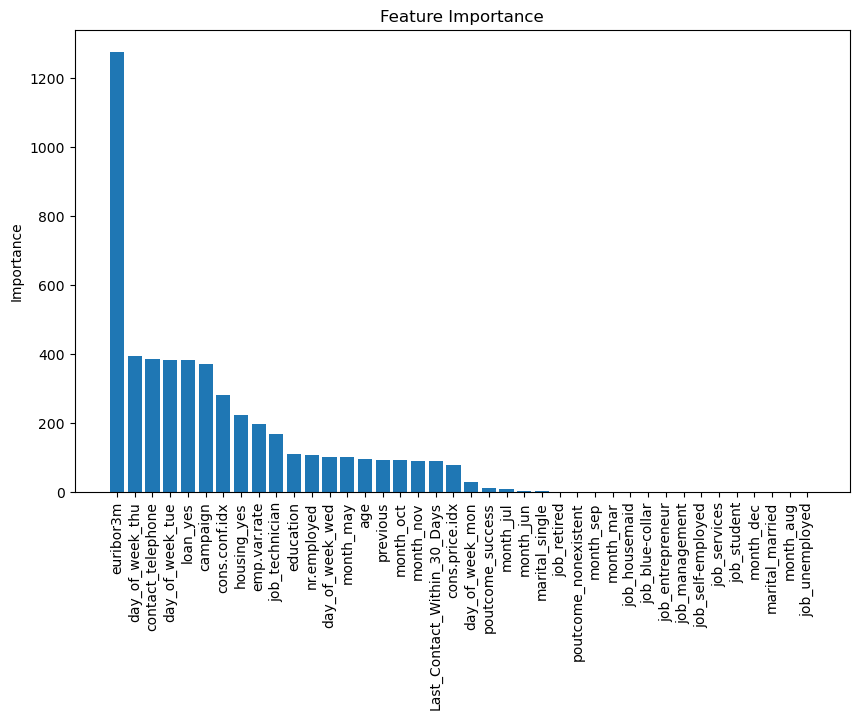

In [89]:
feat_model = final_pipeline.fit(X_train, y_train)
lgbm_model = feat_model.named_steps['Modeling']

feature_importance = lgbm_model.feature_importances_
feature_names = X_train_encoded.columns

sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

#### **6.3.3. Business ML Analysis**

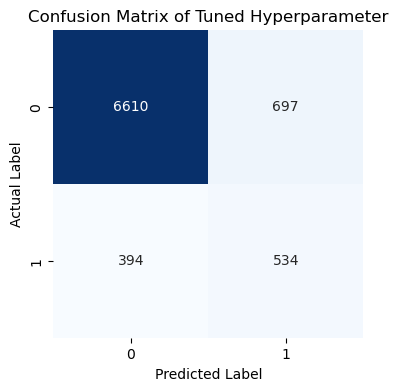

In [74]:
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix of Tuned Hyperparameter")
plt.show()

## **7. Conclusion and Recommendation**

### **7.1. Conclusion**

### **7.2. Recommendation**